<a href="https://colab.research.google.com/github/ecemdurgut/Musteri-Kisilik-Analizi/blob/main/veribilimi_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veri Bilimine Giriş Dönem

## Problem Tanımı ve Proje Amacı

Müşteri Kişilik Analizi, bir şirketin ideal müşterilerinin detaylı bir analizidir. Bir işletmenin müşterilerini daha iyi anlamasına yardımcı olur ve farklı müşteri türlerinin özel ihtiyaçlarına, davranışlarına ve endişelerine göre ürünlerini değiştirmelerini kolaylaştırır.

Müşteri kişilik analizi, bir işletmenin ürününü farklı müşteri segmentlerinden hedef müşterilerine göre değiştirmesine yardımcı olur. Örneğin, bir şirket yeni bir ürünü şirketin veri tabanındaki her müşteriye pazarlamak için para harcamak yerine, hangi müşteri segmentinin ürünü satın alma olasılığının daha yüksek olduğunu analiz edebilir ve ardından ürünü yalnızca bu segmente pazarlayabilir.

Bu projede Farklı teknikler ile Müşteri kişilik analizi yaparak bir Clustring (Kümeleme) problemi çözeceğiz.

## Veri seti ve Parametreleri

Müşteri kişilik analizi problemi için kullanacağımız veri setini Kaggle üzerinden [bu linkten](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data
) elde ettik.


Müşteri segmentlerini özetlemek için kullanacağımız bu veri seti Dr. Omar Romero-Hernandez tarafından hazırlanmıştır.

Veri seti 4 farklı türde verileri içermektedir.
Veri seti parametrelerinin açıklamalarını buradan bulabilirsiniz.

### Parametreler

People

*   ID: Müşterinin benzersiz tanımlayıcısı
*   Year_Birth: Müşterinin doğum yılı
*   Education: Müşterinin eğitim seviyesi
*   Marital_Status: Müşterinin medeni durumu
*   Income: Müşterinin yıllık hane geliri
*   Kidhome: Müşterinin hanesindeki çocuk sayısı
*   Teenhome: Müşterinin hanesindeki genç sayısı
*   Dt_Customer: Müşterinin şirkete kayıt tarihi
*   Recency: Müşterinin son satın alımından bu yana geçen gün sayısı
*   Complain: Müşteri son 2 yıl içinde şikayette bulunduysa 1, aksi takdirde 0


Products

*   MntWines: Son 2 yılda şarap için harcanan miktar
*   MntFruits: Son 2 yılda meyveler için harcanan miktar
*   MntMeatProducts: Son 2 yılda et için harcanan miktar
*   MntFishProducts: Son 2 yılda balık için harcanan miktar
*   MntSweetProducts: Son 2 yılda şekerleme için harcanan miktar
*   MntGoldProds: Son 2 yılda altın için harcanan miktar


Promotion

*   NumDealsPurchases: İndirimle yapılan satın alma sayısı
*   AcceptedCmp1: Müşteri 1. kampanyada teklifi kabul ettiyse 1, aksi takdirde 0
*   AcceptedCmp2: Müşteri 2. kampanyada teklifi kabul ettiyse 1, aksi takdirde 0
*   AcceptedCmp3: Müşteri 3. kampanyada teklifi kabul ettiyse 1, aksi takdirde 0
*   AcceptedCmp4: Müşteri 4. kampanyada teklifi kabul ettiyse 1, aksi takdirde 0
*   AcceptedCmp5: Müşteri 5. kampanyada teklifi kabul ettiyse 1, aksi takdirde 0
*   Response: Müşteri son kampanyada teklifi kabul etmişse 1, aksi takdirde 0


Place

*   NumWebPurchases: Şirketin web sitesi üzerinden yapılan satın alma sayısı
*   NumCatalogPurchases: Katalog kullanılarak yapılan satın alma sayısı
*   NumStorePurchases: Doğrudan mağazalardan yapılan satın alma sayısı
*   NumWebVisitsMonth: Son bir ay içinde şirketin web sitesine yapılan ziyaret sayısı

In [ ]:
# Kütüphanelerin aktarımı
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


palette = ["#a7e149","#e149a7", "#c393f4", "#d683f2", "#dd9e9e", "#fa91aa", "#fc9e9e", "#49e183", "#aa91aa", "#ff93f4"]

In [ ]:
# Veri setinin içe aktarımı
df = pd.read_csv('marketing_campaign.csv', sep='\t')

FileNotFoundError: ignored

In [ ]:
df.head().T

0           1           2           3  \
ID                         5524        2174        4141        6182   
Year_Birth                 1957        1954        1965        1984   
Education            Graduation  Graduation  Graduation  Graduation   
Marital_Status           Single      Single    Together    Together   
Income                  58138.0     46344.0     71613.0     26646.0   
Kidhome                       0           1           0           1   
Teenhome                      0           1           0           0   
Dt_Customer          04-09-2012  08-03-2014  21-08-2013  10-02-2014   
Recency                      58          38          26          26   
MntWines                    635          11         426          11   
MntFruits                    88           1          49           4   
MntMeatProducts             546           6         127          20   
MntFishProducts             172           2         111          10   
MntSweetProducts             88           1          21           3   
MntGoldProds                 88           6          42           5   
NumDealsPurchases             3           2           1           2   
NumWebPurchases               8           1           8           2   
NumCatalogPurchases          10           1           2           0   
NumStorePurchases             4           2          10           4   
NumWebVisitsMonth             7           5           4           6   
AcceptedCmp3                  0           0           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0           0           0   
Z_CostContact                 3           3           3           3   
Z_Revenue                    11          11          11          11   
Response                      1           0           0           0   

                              4  
ID                         5324  
Year_Birth                 1981  
Education                   PhD  
Marital_Status          Married  
Income                  58293.0  
Kidhome                       1  
Teenhome                      0  
Dt_Customer          19-01-2014  
Recency                      94  
MntWines                    173  
MntFruits                    43  
MntMeatProducts             118  
MntFishProducts              46  
MntSweetProducts             27  
MntGoldProds                 15  
NumDealsPurchases             5  
NumWebPurchases               5  
NumCatalogPurchases           3  
NumStorePurchases             6  
NumWebVisitsMonth             5  
AcceptedCmp3                  0  
AcceptedCmp4                  0  
AcceptedCmp5                  0  
AcceptedCmp1                  0  
AcceptedCmp2                  0  
Complain                      0  
Z_CostContact                 3  
Z_Revenue                    11  
Response                      0

## Veri İnceleme, Temizleme ve Özellik mühendisliği

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Boş veri kontrolü
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Boş verilerin atılması
df.dropna(inplace=True)

In [ ]:
df['Dt_Customer'].head()


0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [ ]:
# Kayıt tarihinin veri dönüşümü ve incelenmesi
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"],format='%d-%m-%Y')
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)

print(f"En yeni kayıtlı müşteri :- {max(dates)}")
print(f"En eski kayıtlı müşteri :- {min(dates)}")

En yeni kayıtlı müşteri :- 2014-06-29
En eski kayıtlı müşteri :- 2012-07-30


In [ ]:
# Kategorik verileri daha iyi anlayabilmek için metin düzenleme işlemine yazılan fonksiyon
def categorical_data(data):
    cat_columns = data.select_dtypes(['object']).columns

    for col in cat_columns:
        data[col] = data[col].str.strip() # Gereksiz boşlukları kaldırır
        data[col] = data[col].str.lower() # Tüm metinleri küçük harfe çevirir
        data[col] = data[col].str.replace('[^a-zA-Z0-9\s-]', '', regex=True) # metin düzenleme işlemini sağlar

    return data

In [ ]:
df = categorical_data(df)

In [ ]:
# Yaşa göre kuşakları grupladığımız fonksiyon
def assign_generation(year):
    if 1928 <= year <= 1945:
        return 'Silent Generation'
    elif 1946 <= year <= 1964:
        return 'Baby Boomers'
    elif 1965 <= year <= 1980:
        return 'Generation X'
    elif 1981 <= year <= 1996:
        return 'Millennials'
    elif 1997 <= year <= 2012:
        return 'Generation Z'
    else:
        return 'Generation Alpha'  # 2012 sonrasında doğanları kapsar

df['Generation'] = df['Year_Birth'].apply(assign_generation)

In [ ]:
# Yıllık kazanılan miktara göre bütçe gruplandırması yaptığımız fonksiyon
def income_grouping(income):
    if income < 25000:
        return 'Below 25,000'
    elif income < 35000:
        return '25,001-35,000'
    elif income < 45000:
        return '35,001-45,000'
    elif income < 55000:
        return '45,001-55,000'
    elif income < 65000:
        return '55,001-65,000'
    elif income < 75000:
        return '65,001-75,000'
    else:
        return 'Above 75,000'

df['Income_Group'] = df['Income'].apply(income_grouping)

In [ ]:
# Toplam kampanya yanıtlarını buluruz
df['TotalAcceptedCmps'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [ ]:
# Medeni durumlara verilen yanıtları kategorize ettiğimiz fonkisyon
def marital_grouping(status):
    if status in ['married', 'together']:
        return 'In Relationship'
    elif status in ['single', 'divorced', 'widow']:
        return 'Not In Relationship'
    else:
        return 'Undefined'

df['Marital_Group'] = df['Marital_Status'].apply(marital_grouping)

In [ ]:
# Doğum yılına göre yaşları bularak yeni bir sütun olarak ekledik
df['Age'] = 2023 - df['Year_Birth']


In [ ]:
# Son 30 gün içinde alış veriş yapmış olma durumunu yeni bir sütun olarak ekledik
df['in_last_month'] = df['Recency'].apply(lambda x: 'yes' if x <= 30 else 'no')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
df.head().T

0                    1  \
ID                                  5524                 2174   
Year_Birth                          1957                 1954   
Education                     graduation           graduation   
Marital_Status                    single               single   
Income                           58138.0              46344.0   
Kidhome                                0                    1   
Teenhome                               0                    1   
Dt_Customer          2012-09-04 00:00:00  2014-03-08 00:00:00   
Recency                               58                   38   
MntWines                             635                   11   
MntFruits                             88                    1   
MntMeatProducts                      546                    6   
MntFishProducts                      172                    2   
MntSweetProducts                      88                    1   
MntGoldProds                          88                    6   
NumDealsPurchases                      3                    2   
NumWebPurchases                        8                    1   
NumCatalogPurchases                   10                    1   
NumStorePurchases                      4                    2   
NumWebVisitsMonth                      7                    5   
AcceptedCmp3                           0                    0   
AcceptedCmp4                           0                    0   
AcceptedCmp5                           0                    0   
AcceptedCmp1                           0                    0   
AcceptedCmp2                           0                    0   
Complain                               0                    0   
Z_CostContact                          3                    3   
Z_Revenue                             11                   11   
Response                               1                    0   
Generation                  Baby Boomers         Baby Boomers   
Income_Group               55,001-65,000        45,001-55,000   
TotalAcceptedCmps                      0                    0   
Marital_Group        Not In Relationship  Not In Relationship   
Age                                   66                   69   
in_last_month                         no                   no   

                                       2                    3  \
ID                                  4141                 6182   
Year_Birth                          1965                 1984   
Education                     graduation           graduation   
Marital_Status                  together             together   
Income                           71613.0              26646.0   
Kidhome                                0                    1   
Teenhome                               0                    0   
Dt_Customer          2013-08-21 00:00:00  2014-02-10 00:00:00   
Recency                               26                   26   
MntWines                             426                   11   
MntFruits                             49                    4   
MntMeatProducts                      127                   20   
MntFishProducts                      111                   10   
MntSweetProducts                      21                    3   
MntGoldProds                          42                    5   
NumDealsPurchases                      1                    2   
NumWebPurchases                        8                    2   
NumCatalogPurchases                    2                    0   
NumStorePurchases                     10                    4   
NumWebVisitsMonth                      4                    6   
AcceptedCmp3                           0                    0   
AcceptedCmp4                           0                    0   
AcceptedCmp5                           0                    0   
AcceptedCmp1                           0                    0   
AcceptedCmp2                           0                    0   
Complain

In [ ]:
# Unique sayılarımızı inceledik
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Generation                5
Income_Group              7
TotalAcceptedCmps         5
Marital_Group             3
Age                      59
in_last_month             2
dtype: int64

#### NOT: Yeni değişkenler yaratma sebebimiz kümeleme problemlerinde veri setini daha iyi anlamak, kümeleme algoritmalarının performansını artırmak ve anlamlı gruplamalar elde etmek amacıyla gerçekleştirdik

In [ ]:
# Gereksiz sütunları kaldırdık
columns_to_drop = ['ID', 'Z_CostContact', 'Z_Revenue']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  graduation         single  58138.0        0         0   
1           1954  graduation         single  46344.0        1         1   
2           1965  graduation       together  71613.0        0         0   
3           1984  graduation       together  26646.0        1         0   
4           1981         phd        married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  graduation        married  61223.0        0         1   
2236        1946         phd       together  64014.0        2         1   
2237        1981  graduation       divorced  56981.0        0         0   
2238        1956      master       together  69245.0        0         1   
2239        1954         phd        married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp1  \
0     2012-09-04       58       635         88  ...             0   
1     2014-03-08       38        11          1  ...             0   
2     2013-08-21       26       426         49  ...             0   
3     2014-02-10       26        11          4  ...             0   
4     2014-01-19       94       173         43  ...             0   
...          ...      ...       ...        ...  ...           ...   
2235  2013-06-13       46       709         43  ...             0   
2236  2014-06-10       56       406          0  ...             1   
2237  2014-01-25       91       908         48  ...             0   
2238  2014-01-24        8       428         30  ...             0   
2239  2012-10-15       40        84          3  ...             0   

      AcceptedCmp2  Complain  Response    Generation   Income_Group  \
0                0         0         1  Baby Boomers  55,001-65,000   
1                0         0         0  Baby Boomers  45,001-55,000   
2                0         0         0  Generation X  65,001-75,000   
3                0         0         0   Millennials  25,001-35,000   
4                0         0         0   Millennials  55,001-65,000   
...            ...       ...       ...           ...            ...   
2235             0         0         0  Generation X  55,001-65,000   
2236             0         0         0  Baby Boomers  55,001-65,000   
2237             0         0         0   Millennials  55,001-65,000   
2238             0         0         0  Baby Boomers  65,001-75,000   
2239             0         0         1  Baby Boomers  45,001-55,000   

      TotalAcceptedCmps        Marital_Group  Age  in_last_month  
0                     0  Not In Relationship   66             no  
1                     0  Not In Relationship   69             no  
2                     0      In Relationship   58            yes  
3                     0      In Relationship   39            yes  
4                     0      In Relationship   42             no  
...                 ...                  ...  ...            ...  
2235                  0      In Relationship   56             no  
2236                  1      In Relationship   77             no  
2237                  1  Not In Relationship   42             no  
2238                  0      In Relationship   67            yes  
2239                  0      In Relationship   69             no  

[2216 rows x 32 columns]

## EDA

### Eğitim
Eğitim genellikle satın alma davranışlarını, tercihleri ve hatta marka bağlılıklarını etkileyebilir. Veri kümesinin eğitim niteliklerini nasıl ayırdığı aşağıda açıklanmıştır:

Mezuniyet - 1.116 üye:
Lisans derecelerini tamamlamış bireylerden oluşan en büyük grup. Bu grup geniş bir ilgi alanı ve satın alma davranışı yelpazesine sahip olabilir.

Doktora - 481 üye:
En yüksek akademik yeterliliğe sahip önemli bir kesim. Kaliteye, araştırmaya dayalı satın alımlara öncelik verebilir ve daha yüksek bir satın alma gücüne sahip olabilirler.

Yüksek Lisans - 365 üye:
Lisansüstü derecelere sahip olan bu kişilerin belirli zevklere ve potansiyel olarak daha yüksek harcanabilir gelire sahip profesyoneller olması muhtemeldir.

2n Döngüsü - 200 üye:
Bu segment, belirli bir eğitim sisteminin yeterliliğini temsil edebilir, belki de lisansüstü diplomaya veya bazı uzmanlık eğitimlerine eşdeğerdir.

Temel - 54 üye:
Temel eğitime sahip olanlar, satın alma tercihleri daha faydacı ve bütçe bilincine sahip olabilir.

Bu kategorilerin anlaşılması, işletmelere pazarlama stratejilerini her bir grubun kendine has özelliklerine ve tercihlerine göre uyarlama konusunda yardımcı olabilir.

In [ ]:
df['Education'].value_counts()

graduation    1116
phd            481
master         365
2n cycle       200
basic           54
Name: Education, dtype: int64

In [ ]:
# Analizi kolaylaştırmak ve daha hızlı şekilde grafikler çizebilmek için oluşturduğumuz fonksiyon
def draw_plot(data, figsize=(8, 6), colors=None):
    """
6'dan az benzersiz gözlem içeren veriler için pasta grafik çizer.
Aksi takdirde bir çubuk grafik çizer.

    """

    if not isinstance(data, pd.Series):
        raise ValueError("Kategorik bir veri girmelisiniz.")

    counts = data.value_counts()

    fig, ax = plt.subplots(figsize=figsize)

    # 6'dan az benzersiz gözlem varsa, bir pasta grafik çiz
    if len(counts) <= 5:
        counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax)
        ax.set_title("Pie Chart of " + data.name)
        ax.set_ylabel("")
    else:
        # Aksi takdirde bar chart çiz
        sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=ax)
        ax.set_title("Bar Chart of " + data.name)
        ax.set_ylabel("Count")

    plt.tight_layout()
    plt.show()

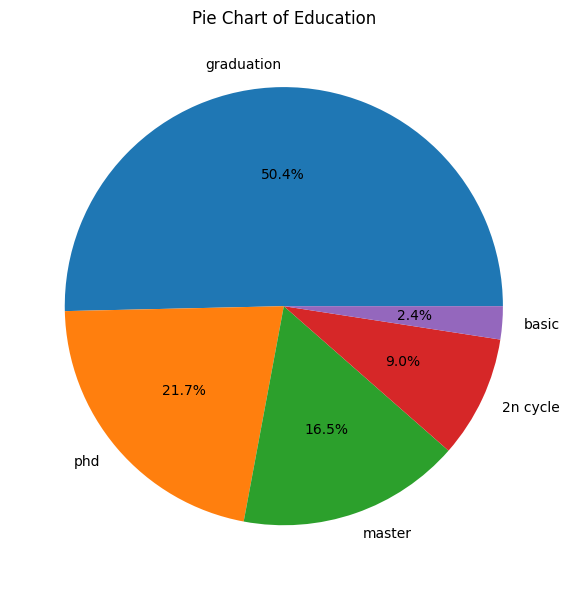

In [ ]:
draw_plot(df['Education'])


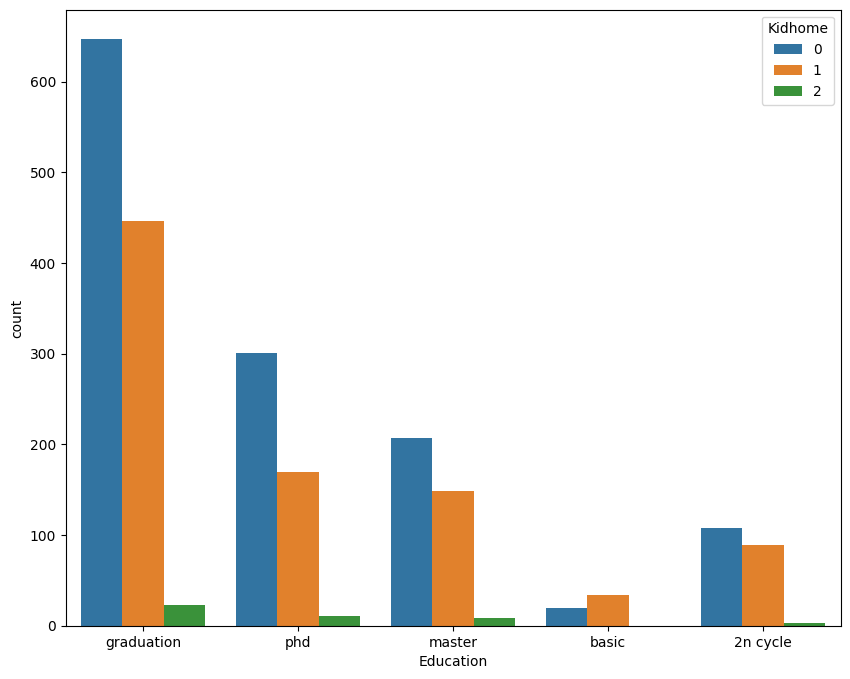

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x = 'Education', hue = 'Kidhome')
plt.show()

### Medeni Durum

İlişki durumu, satın alma davranışları ve yaşam tarzı seçimleri hakkında çok şey ortaya koyabilir. İşte medeni kategorilerin bir dökümü:

İlişki İçinde - 1.430 üye:
Evli olan veya bir partnerle birlikte yaşayanları kapsamaktadır. Bu bireyler genellikle ortak mali kaynaklara sahiptir ve ortak satın alma kararları alabilirler.

İlişkisi Olmayanlar - 779 üye:
Bekarları, boşanmışları ve dulları kapsar. Genellikle bireysel ihtiyaçları karşıladıkları için satın alma tercihleri farklılık gösterebilir.

Tanımsız - 7 üye:
Bu grup 'Yalnız', 'Saçma' veya 'YOLO' gibi geleneksel olmayan veya alışılmışın dışında ilişki durumlarından oluşur. Satın alma modelleri daha az tahmin edilebilir olabilir.

In [ ]:
df['Marital_Group'].value_counts()

In Relationship        1430
Not In Relationship     779
Undefined                 7
Name: Marital_Group, dtype: int64

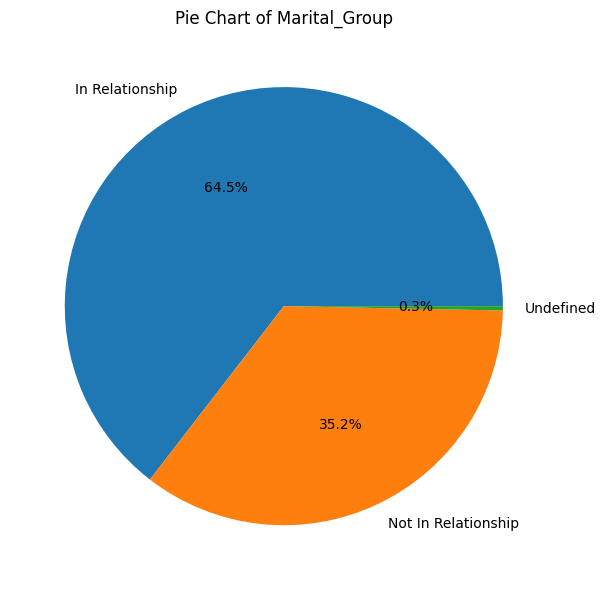

In [ ]:
draw_plot(df['Marital_Group'])

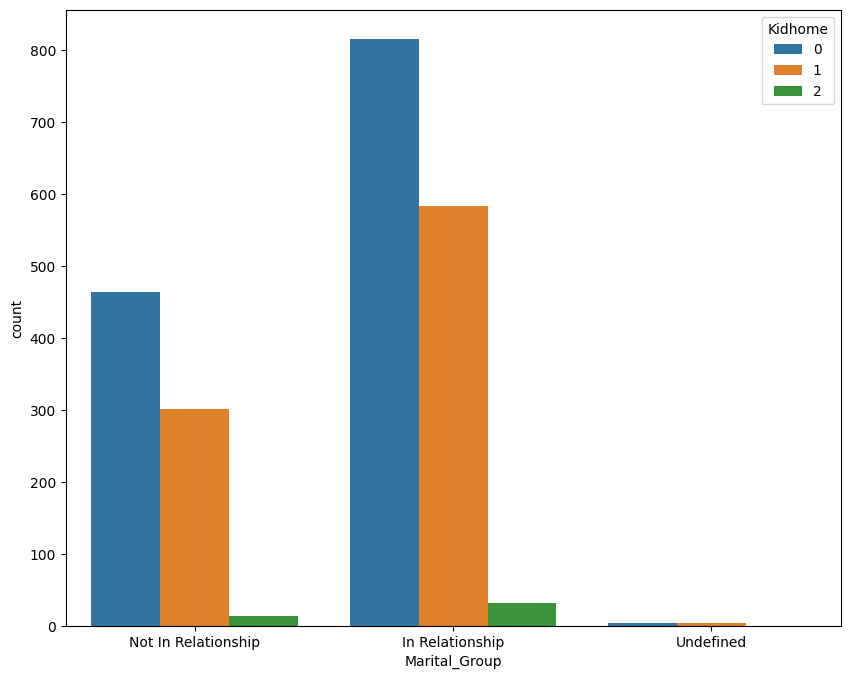

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x = 'Marital_Group', hue = 'Kidhome')
plt.show()

### Kuşaklar
X Kuşağı (1965-1980) - 1061 üye:
Bebek patlamasından sonra doğdular, kişisel bilgisayarların ve MTV'nin ortaya çıkışıyla büyüdüler. Uyum sağlama yetenekleri nedeniyle değerlidirler.

Baby Boomers (1946-1964) - 749 üye:
İkinci Dünya Savaşı sonrası doğan bu grup, 20. yüzyılın önemli olaylarına tanıklık etmiştir. Sadakatleri ve yüz yüze etkileşimi tercih etmeleriyle bilinirler.

Y Kuşağı (1981-1996) - 380 üye:
Teknoloji meraklısı dijital yerliler, sahip olduklarından ziyade deneyimlere değer verirler ve daha liberal görüşlere sahiptirler.

Sessiz Kuşak (1928-1945) - 23 üye:
İki Dünya Savaşı arasında doğan bu kuşak, dayanıklılık ve gelenekçilik ile karakterize edilmektedir.

Alfa Kuşağı (2010'lar-2025'ler) - 3 üye:
Y kuşağının çocuklarıdır, tamamen 21. yüzyılda yetişmişlerdir ve teknolojiye son derece yatkın olmaları beklenir.

In [ ]:
df['Generation'].value_counts()

Generation X         1061
Baby Boomers          749
Millennials           380
Silent Generation      23
Generation Alpha        3
Name: Generation, dtype: int64

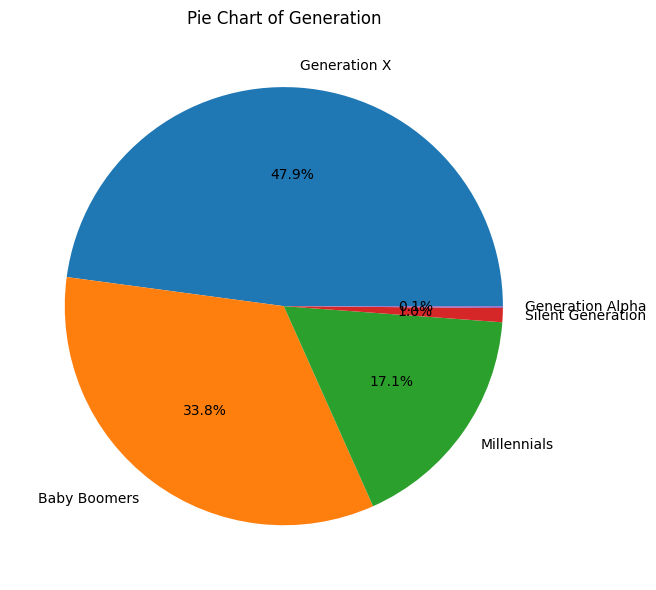

In [ ]:
draw_plot(df['Generation'])

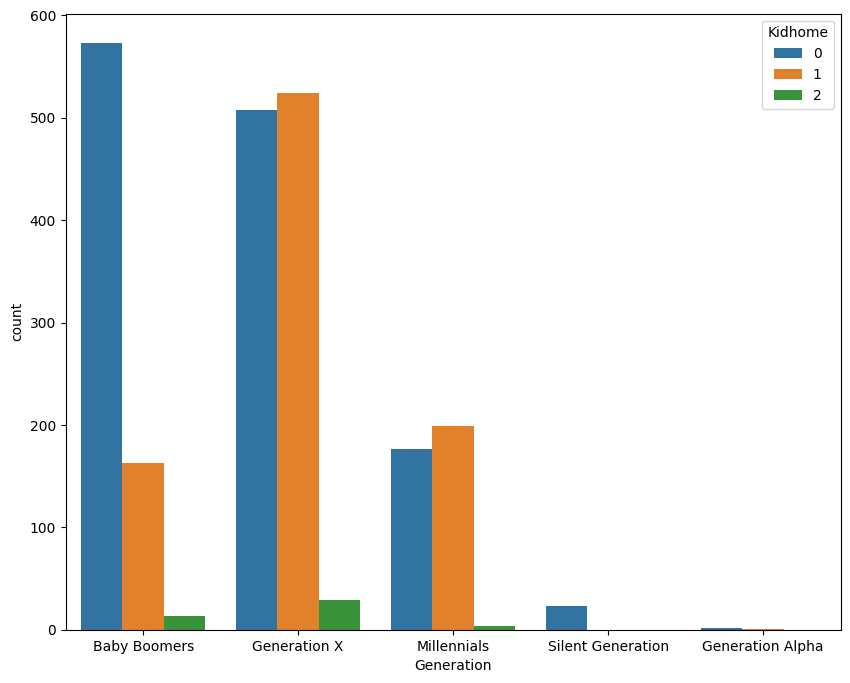

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x = 'Generation', hue = 'Kidhome')
plt.show()

### Yaş
Müşterilerin yaşını temsil eden Yaş değişkeni, şirketin müşteri kitlesinin yaş demografisi hakkında önemli bilgiler sağlar.

Çarpıklık: Çarpıklık değeri 0.353661 ile yaş dağılımı hafif pozitif çarpıktır. Bu, veri setinin yaşlılara kıyasla biraz daha fazla sayıda genç müşteri içerdiğini, ancak önemli ölçüde olmadığını göstermektedir.
Yaş dağılımının yorumlanması, pazarlama kampanyalarının, ürün tekliflerinin ve hizmetlerin baskın yaş grubuna göre uyarlanmasına yardımcı olduğu için çok önemlidir

In [ ]:
df["Age"].agg(["min","mean","median","max","std","skew"]).to_frame().T

min       mean  median    max        std      skew
Age  27.0  54.179603    53.0  130.0  11.985554  0.353661

In [ ]:
# Numeric dataların grafik çizimini kolaylaştırmak için oluşturduğumuz fonksiyon
def draw_numeric_plot(data):

    num_unique = data.nunique()

    if num_unique == 2:
        # Donut chart
        plt.figure(figsize=(8, 6))
        # Değer sayılarını ve etiketleri çıkarın
        counts = data.value_counts()
        labels = counts.index

        # Plot
        wedges, texts, autotexts = plt.pie(counts, labels=labels, wedgeprops=dict(width=0.4),
                                           autopct='%1.1f%%', startangle=140, pctdistance=0.85)

        # Merkez daire çizimi
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        plt.gca().add_artist(centre_circle)

        # Metin görünürlüğünü ayarla
        for text, autotext in zip(texts, autotexts):
            text.set(size=12)
            autotext.set(size=12)

        plt.title(f"Donut Chart of {data.name}")
        plt.ylabel("")
        plt.legend(loc="best")

    elif 3 <= num_unique <= 50:
        # Bar chart
        plt.figure(figsize=(12, 6))
        data.value_counts().sort_index().plot(kind='bar', color='skyblue')
        plt.title(f"Bar Chart for {data.name}")
        plt.ylabel("Frequency")
        plt.xlabel(data.name)

    elif 51 <= num_unique < 90:
        # Basit histgram
        plt.figure(figsize=(12, 6))
        plt.hist(data, bins=30, edgecolor='black', color='skyblue')
        plt.title(f"Histogram of {data.name}")
        plt.ylabel("Frequency")
        plt.xlabel(data.name)

    elif num_unique >= 90:
        # Histogram ve boxplot
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))

        ax[0].hist(data, bins=30, edgecolor='black', color='skyblue')
        ax[0].set_title(f"Histogram of {data.name}")
        ax[0].set_ylabel("Frequency")
        ax[0].set_xlabel(data.name)

        ax[1].boxplot(data, vert=False)
        ax[1].set_title(f"Boxplot of {data.name}")
        ax[1].set_yticklabels([data.name])

    plt.tight_layout()
    plt.show()

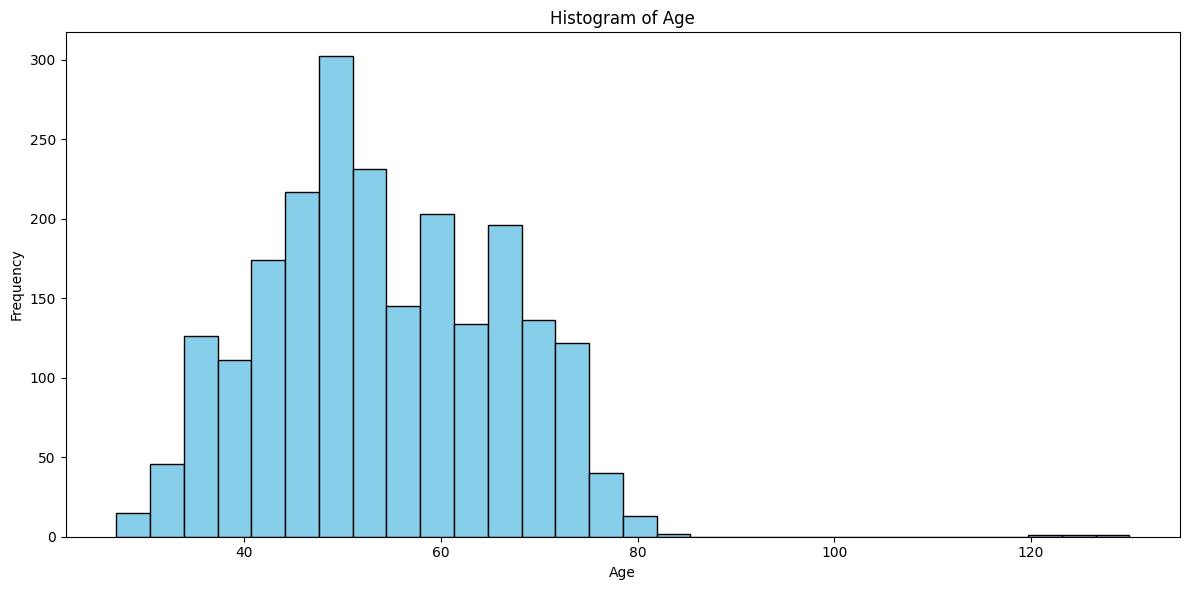

In [ ]:
draw_numeric_plot(df['Age'])

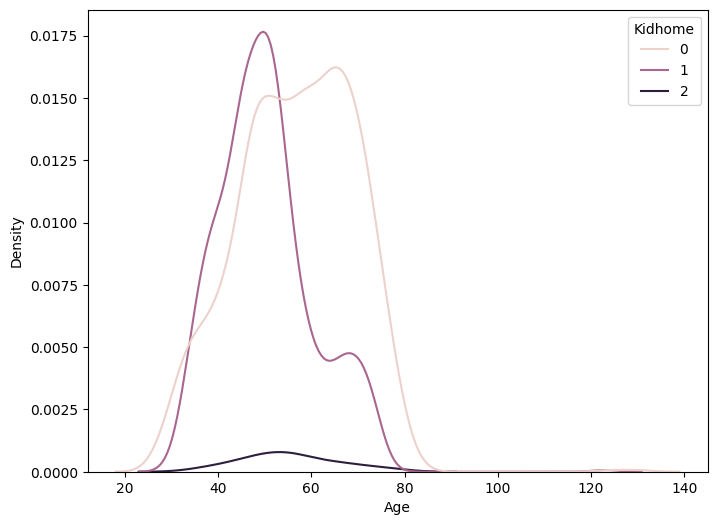

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="Age", hue="Kidhome")
plt.show()

### Yakın Zamandaki Satın Alma Davranışı: Son Bir Ay İçerisindeki İşlemler
Satın Almadı (Hayır) - 1.498 müşteri:
Büyük bir kesim yakın zamanda işlem yapmadı ve etkileşimde potansiyel iyileştirme alanlarına işaret ediyor.

Alışveriş Yaptı (Evet) - 718 müşteri:
Oldukça büyük bir grup yakın zamanda etkileşimde bulunarak başarılı pazarlama veya cazip ürün tekliflerine işaret etti.

In [ ]:
df['in_last_month'].value_counts()

no     1498
yes     718
Name: in_last_month, dtype: int64

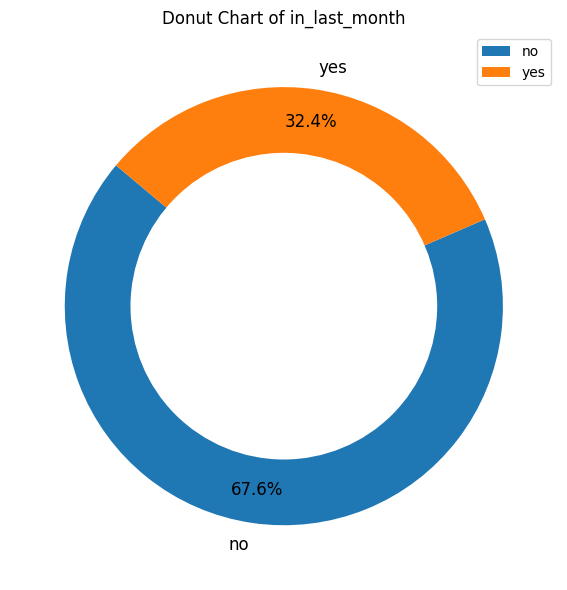

In [ ]:
draw_numeric_plot(df['in_last_month'])

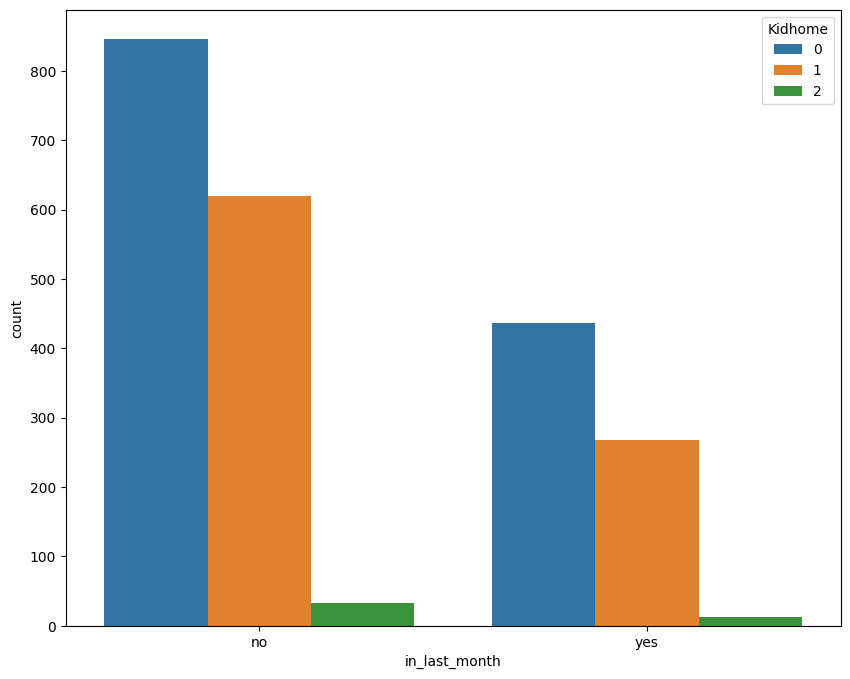

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x = 'in_last_month', hue = 'Kidhome')
plt.show()

### Gelir Dağılımı
Veri["Income"] 6.763487'luk bir çarpıklığa sahiptir, bu da sağa çarpık bir dağılıma işaret eder. Bu, çoğu bireyin düşük ila ortalama aralıkta gelire sahip olmasına rağmen, önemli ölçüde daha yüksek gelire sahip daha küçük bir grup olduğunu göstermektedir. Bu yüksek gelirler ortalamayı yukarı çekerek medyanı bu veriler için potansiyel olarak daha temsili bir ölçü haline getirmektedir.

In [ ]:
df["Income"].agg(["min","mean","median","max","std","skew"]).to_frame().T

min          mean   median       max           std      skew
Income  1730.0  52247.251354  51381.5  666666.0  25173.076661  6.763487

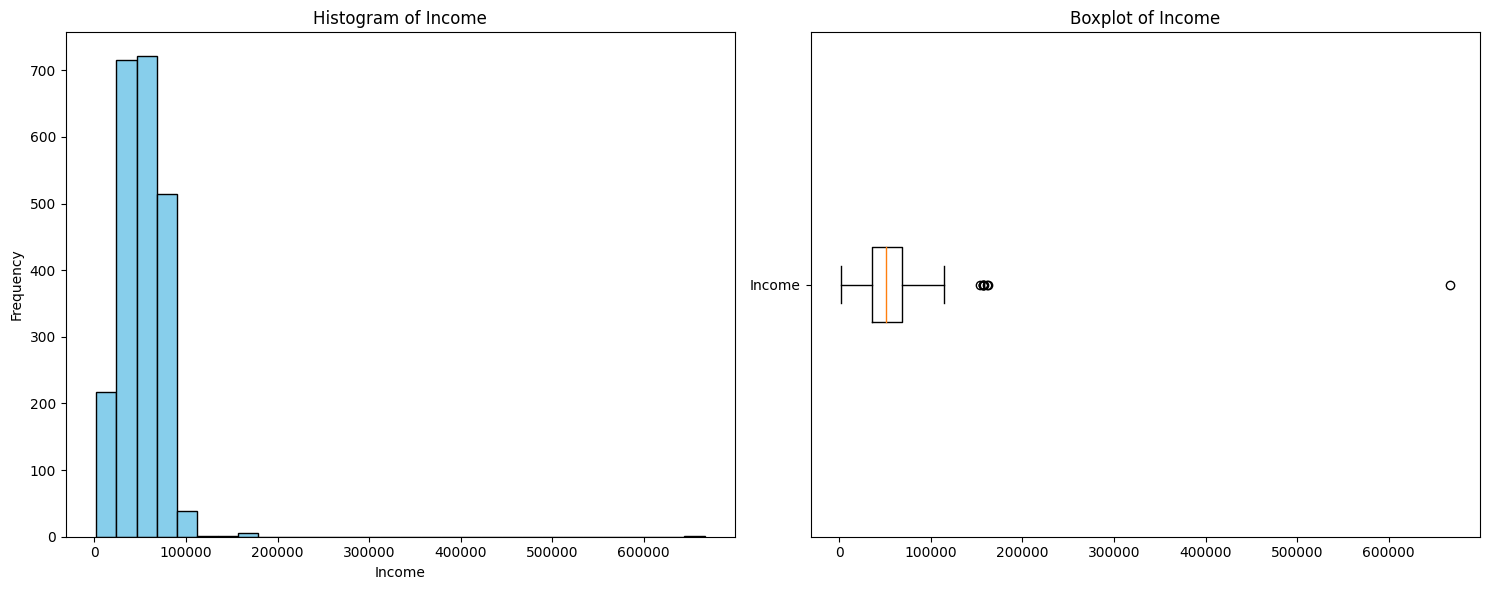

In [ ]:
draw_numeric_plot(df['Income'])

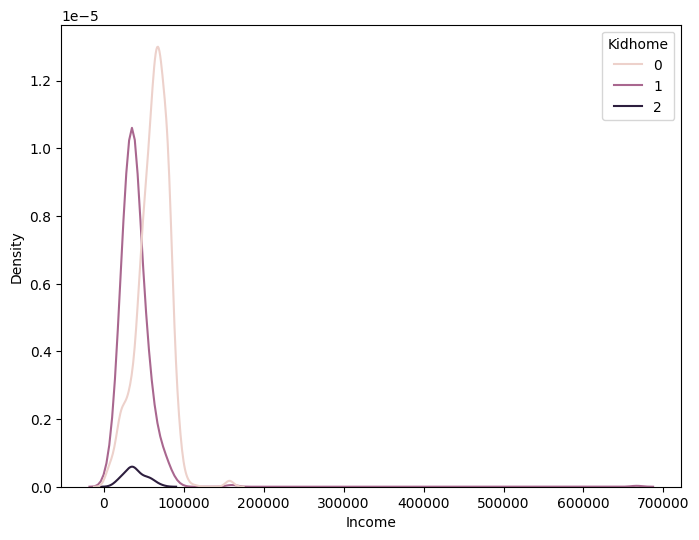

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="Income", hue="Kidhome")
plt.show()

### Promosyonlara Yanıt Analizi
Yanıt, en son promosyon kampanyasının etkinliğine ilişkin içgörüler sunar:

Kabul Edilenler (333 Müşteri): Bu grup, en son promosyon teklifinin cazibesine kapılan ve bu teklifle etkileşime geçmeyi seçen müşterileri temsil etmektedir. Bu grubun varlığı, kampanyanın müşterilerimizin bir bölümüne hitap ettiğinin altını çizmektedir.

Reddedilenler (1883 Müşteri): Önemli ölçüde daha büyük bir grup, kampanyanın geniş bir erişime sahip olmasına rağmen yankısının seçici olduğunu gösteriyor. Bu durum pek çok şeye işaret edebilir: belki de teklif pek çok kişiye hitap etmiyordu, niş bir kesimi hedefliyordu ya da iletişim aracı etkili değildi.

Bu metrikleri derinlemesine incelemek, bu tür tepkilerin arkasındaki nedenleri aydınlatarak gelecekteki kampanyaları optimize etmek ve daha geniş bir kitleye hitap etmelerini sağlamak için değerli geri bildirimler sunabilir.

In [ ]:
df['Response'].value_counts()

0    1883
1     333
Name: Response, dtype: int64

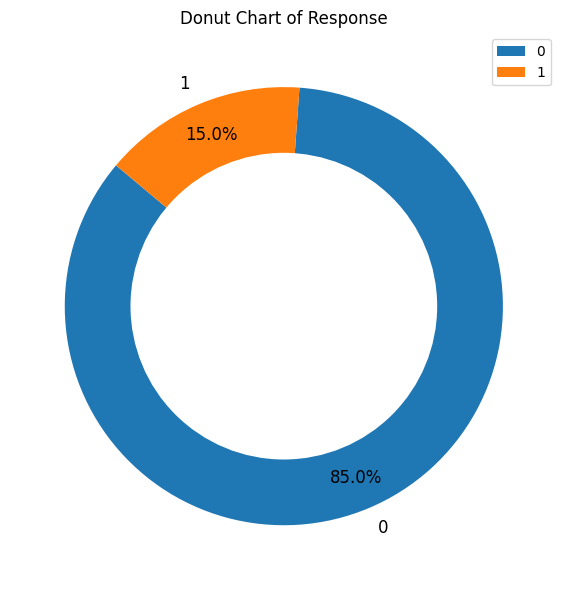

In [ ]:
draw_numeric_plot(df['Response'])


### Müşteri fırsat eğilimi
NumDealsPurchases, müşterilerin fırsat ve indirimlere olan eğilimlerine ışık tutuyor:

1 Fırsat (960 Müşteri): Belki de ilk keşifleri ya da seçici fırsat tercihlerini gösteren baskın bir segment.

2 Fırsat (493 Müşteri): Promosyon teklifleri ile devam eden etkileşimi göstermektedir.

3-5 Fırsat (575 Müşteri): Burada, belirli fırsatlarla seçici bir etkileşim olduğunu düşündüren bir düşüş görüyoruz.

6+ Fırsat (144 Müşteri): Bunlar, sayıları daha az olsa da her zaman pazarlık yapmaya hevesli, sık fırsat arayan müşterilerimizdir.

Fırsat Yok (44 Müşteri): Promosyonlardan etkilenmeyen küçük bir grup. Satın alma kararları başka faktörler tarafından yönlendiriliyor olabilir.

Bu dağılım, müşteri tabanımızdaki farklı promosyon iştahlarını vurgulamakta ve çok yönlü bir promosyon stratejisine ihtiyaç duyulduğunu göstermektedir.

In [ ]:
df['NumDealsPurchases'].value_counts()

1     960
2     493
3     293
4     188
5      94
6      60
0      44
7      39
8      14
9       8
15      7
10      5
11      5
13      3
12      3
Name: NumDealsPurchases, dtype: int64

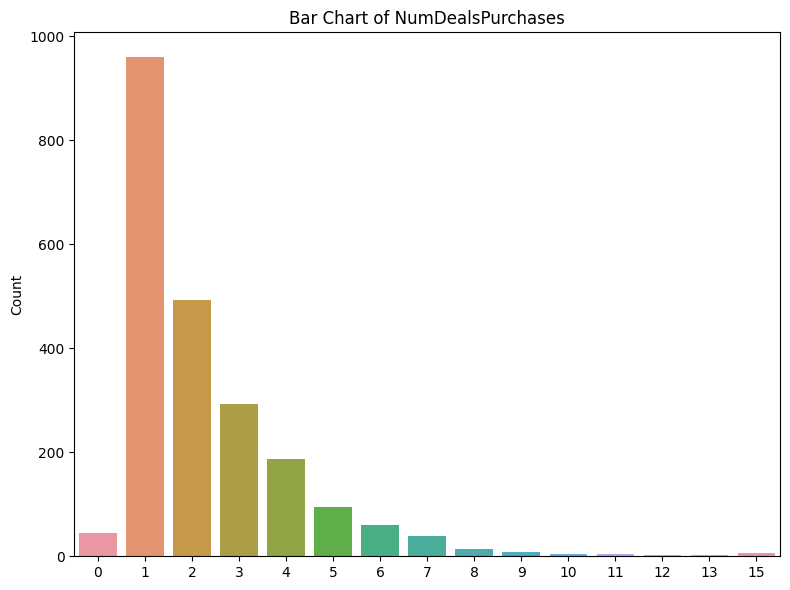

In [ ]:
draw_plot(df['NumDealsPurchases'])


#### Kampanya eğilimleri
TotalAcceptedCmps metriği, her bir müşterinin olumlu yanıt verdiği pazarlama kampanyalarının kümülatif sayısı hakkında bilgi sağlar.

0 kampanya: 1.757 müşterinin büyük çoğunluğu hiçbir kampanyayı kabul etmedi.

1 kampanya: 323 müşteri bir kampanyayı kabul etti.

2 kampanya: 81 müşteri iki kampanyaya yanıt verdi.

3 kampanya: 44 müşteri üç kampanyayla olumlu etkileşim kurdu.

4 kampanya: 11 müşteriden oluşan daha küçük bir grup dört kampanyayı kabul etmiştir.

Bu dağılım, müşterilerin pazarlama kampanyalarına ne kadar açık olduklarının bir resmini çizmektedir. Çoğunluğun kampanyalara yanıt vermemesi, pazarlama stratejisinin veya hedefleme yaklaşımının iyileştirilmesi için yer olabileceğini düşündürmektedir.

In [ ]:
df['TotalAcceptedCmps'].value_counts()

0    1757
1     323
2      81
3      44
4      11
Name: TotalAcceptedCmps, dtype: int64

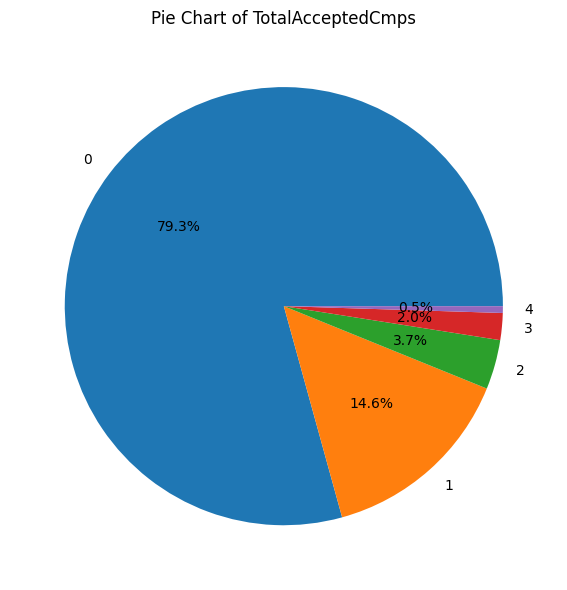

In [ ]:
draw_plot(df['TotalAcceptedCmps'])


<Figure size 800x600 with 0 Axes>

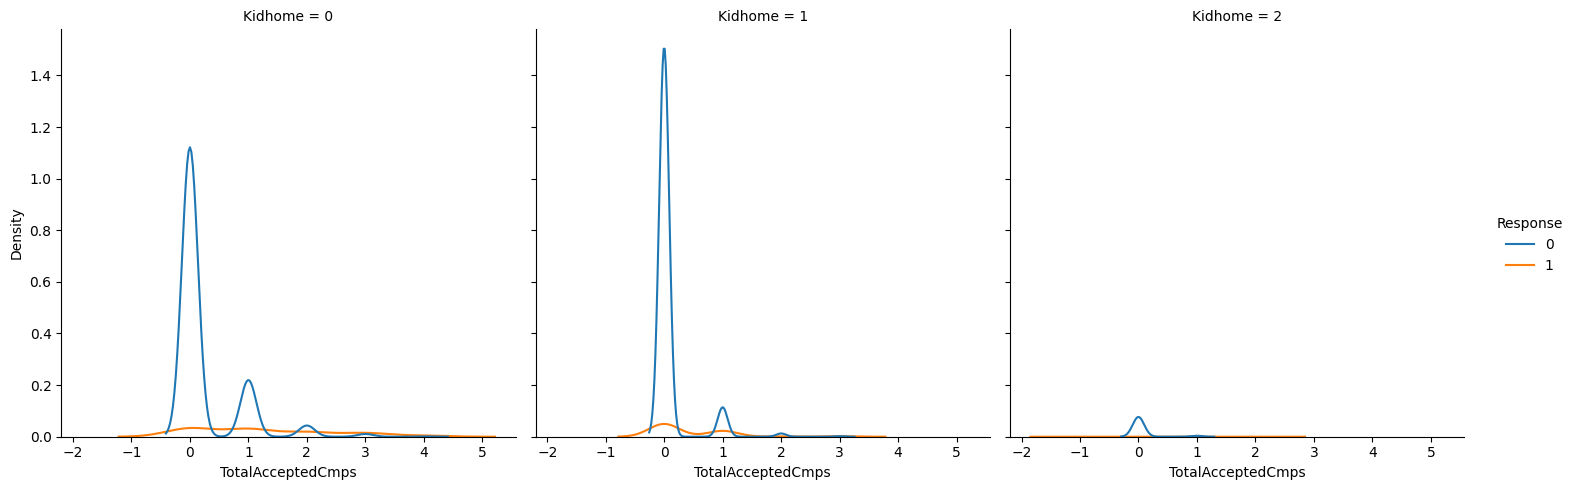

In [ ]:
plt.figure(figsize=(8, 6))
sns.displot(data=df, x="TotalAcceptedCmps", hue="Response", col="Kidhome", kind="kde")
plt.show()

#### NOT: Yukarıdaki analiz daha da geliştirilebilir, spesifik olarak bir parametre üzerine incelemeler arttırılabilir. Biz incelemelerimize kümeleme işlemlerinden sonra kümeler bazında ilerleyeceğiz

# PCA analizi ve Kümeleme

PCA (Principal Component Analysis), temel bileşen analizi olarak da adlandırılan bir veri analizi yöntemidir. PCA, çok boyutlu veri setlerini daha az boyutlu bir forma dönüştürerek veri setinin içindeki temel varyansı yakalamayı amaçlar. Bu, veri setindeki karmaşıklığı azaltabilir ve önemli bilgileri korur.

PCA'nın temel amacı, veri setindeki değişkenlik maksimize edilerek yeni bir koordinat sistemine dönüştürmektir. Bu yeni koordinat sistemi, veri setindeki varyansın büyük bir kısmını koruyarak veri setini daha az boyutlu hale getirir. Bu, özellikle yüksek boyutlu veri setlerinde (çok sayıda değişken içeren) analiz ve görselleştirmenin daha kolay olmasını sağlar.

In [ ]:
df.head().T

0                    1  \
Year_Birth                          1957                 1954   
Education                     graduation           graduation   
Marital_Status                    single               single   
Income                           58138.0              46344.0   
Kidhome                                0                    1   
Teenhome                               0                    1   
Dt_Customer          2012-09-04 00:00:00  2014-03-08 00:00:00   
Recency                               58                   38   
MntWines                             635                   11   
MntFruits                             88                    1   
MntMeatProducts                      546                    6   
MntFishProducts                      172                    2   
MntSweetProducts                      88                    1   
MntGoldProds                          88                    6   
NumDealsPurchases                      3                    2   
NumWebPurchases                        8                    1   
NumCatalogPurchases                   10                    1   
NumStorePurchases                      4                    2   
NumWebVisitsMonth                      7                    5   
AcceptedCmp3                           0                    0   
AcceptedCmp4                           0                    0   
AcceptedCmp5                           0                    0   
AcceptedCmp1                           0                    0   
AcceptedCmp2                           0                    0   
Complain                               0                    0   
Response                               1                    0   
Generation                  Baby Boomers         Baby Boomers   
Income_Group               55,001-65,000        45,001-55,000   
TotalAcceptedCmps                      0                    0   
Marital_Group        Not In Relationship  Not In Relationship   
Age                                   66                   69   
in_last_month                         no                   no   

                                       2                    3  \
Year_Birth                          1965                 1984   
Education                     graduation           graduation   
Marital_Status                  together             together   
Income                           71613.0              26646.0   
Kidhome                                0                    1   
Teenhome                               0                    0   
Dt_Customer          2013-08-21 00:00:00  2014-02-10 00:00:00   
Recency                               26                   26   
MntWines                             426                   11   
MntFruits                             49                    4   
MntMeatProducts                      127                   20   
MntFishProducts                      111                   10   
MntSweetProducts                      21                    3   
MntGoldProds                          42                    5   
NumDealsPurchases                      1                    2   
NumWebPurchases                        8                    2   
NumCatalogPurchases                    2                    0   
NumStorePurchases                     10                    4   
NumWebVisitsMonth                      4                    6   
AcceptedCmp3                           0                    0   
AcceptedCmp4                           0                    0   
AcceptedCmp5                           0                    0   
AcceptedCmp1                           0                    0   
AcceptedCmp2                           0                    0   
Complain                               0                    0   
Response                               0                    0   
Generation                  Generation X          Millennials   
Income_Group               65,001-75,000        25,001-35,000   
TotalAcc

PCA analizi için veri setini biraz daha küçülterek daha kategorik hale getiriyoruz

In [ ]:
df['Marital_Group'].value_counts()

In Relationship        1430
Not In Relationship     779
Undefined                 7
Name: Marital_Group, dtype: int64

In [ ]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

df["Family_Size"] = df["Marital_Group"].replace({"Not In Relationship": 1, "In Relationship":2, "Undefined":1})+ df["Children"]


df["Frequency"]=df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

df["Monetary"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

del_cols = ["Marital_Status", 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response',
           "MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
           "NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases", 'NumWebVisitsMonth',
           "Year_Birth", "Kidhome","Teenhome"]
df =  df.drop(del_cols, axis=1)

In [ ]:
df.head().T

0                    1  \
Education                   graduation           graduation   
Income                         58138.0              46344.0   
Dt_Customer        2012-09-04 00:00:00  2014-03-08 00:00:00   
Recency                             58                   38   
Generation                Baby Boomers         Baby Boomers   
Income_Group             55,001-65,000        45,001-55,000   
TotalAcceptedCmps                    0                    0   
Marital_Group      Not In Relationship  Not In Relationship   
Age                                 66                   69   
in_last_month                       no                   no   
Children                             0                    2   
Family_Size                          1                    3   
Frequency                           25                    6   
Monetary                          1617                   27   

                                     2                    3  \
Education                   graduation           graduation   
Income                         71613.0              26646.0   
Dt_Customer        2013-08-21 00:00:00  2014-02-10 00:00:00   
Recency                             26                   26   
Generation                Generation X          Millennials   
Income_Group             65,001-75,000        25,001-35,000   
TotalAcceptedCmps                    0                    0   
Marital_Group          In Relationship      In Relationship   
Age                                 58                   39   
in_last_month                      yes                  yes   
Children                             0                    1   
Family_Size                          2                    3   
Frequency                           21                    8   
Monetary                           776                   53   

                                     4  
Education                          phd  
Income                         58293.0  
Dt_Customer        2014-01-19 00:00:00  
Recency                             94  
Generation                 Millennials  
Income_Group             55,001-65,000  
TotalAcceptedCmps                    0  
Marital_Group          In Relationship  
Age                                 42  
in_last_month                       no  
Children                             1  
Family_Size                          3  
Frequency                           19  
Monetary                           422

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2216 non-null   object        
 1   Income             2216 non-null   float64       
 2   Dt_Customer        2216 non-null   datetime64[ns]
 3   Recency            2216 non-null   int64         
 4   Generation         2216 non-null   object        
 5   Income_Group       2216 non-null   object        
 6   TotalAcceptedCmps  2216 non-null   int64         
 7   Marital_Group      2216 non-null   object        
 8   Age                2216 non-null   int64         
 9   in_last_month      2216 non-null   object        
 10  Children           2216 non-null   int64         
 11  Family_Size        2216 non-null   int64         
 12  Frequency          2216 non-null   int64         
 13  Monetary           2216 non-null   int64         
dtypes: datet

## Encoding

Encoding, kategorik verileri sayısal formata kodlamak için kullanılan bir ön işleme tekniğidir. Kategorik etiketleriniz veya sınıflarınız olduğunda kullanılır
* LabelEncoder, kategorik bir özellikteki her kategoriye benzersiz bir tamsayı atayarak kategorik verileri etkili bir şekilde sıralı verilere dönüştürür.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

LE=LabelEncoder()
object_cols =["Education","Marital_Group","Generation", "Income_Group", "in_last_month"]
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
print('All features are now numerical')
df.head()

All features are now numerical


Education   Income Dt_Customer  Recency  Generation  Income_Group  \
0          2  58138.0  2012-09-04       58           0             3   
1          2  46344.0  2014-03-08       38           0             2   
2          2  71613.0  2013-08-21       26           2             4   
3          2  26646.0  2014-02-10       26           3             0   
4          4  58293.0  2014-01-19       94           3             3   

   TotalAcceptedCmps  Marital_Group  Age  in_last_month  Children  \
0                  0              1   66              0         0   
1                  0              1   69              0         2   
2                  0              0   58              1         0   
3                  0              0   39              1         1   
4                  0              0   42              0         1   

   Family_Size  Frequency  Monetary  
0            1         25      1617  
1            3          6        27  
2            2         21       776  
3            3          8        53  
4            3         19       422

<ipython-input-55-ef38b6aac63c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


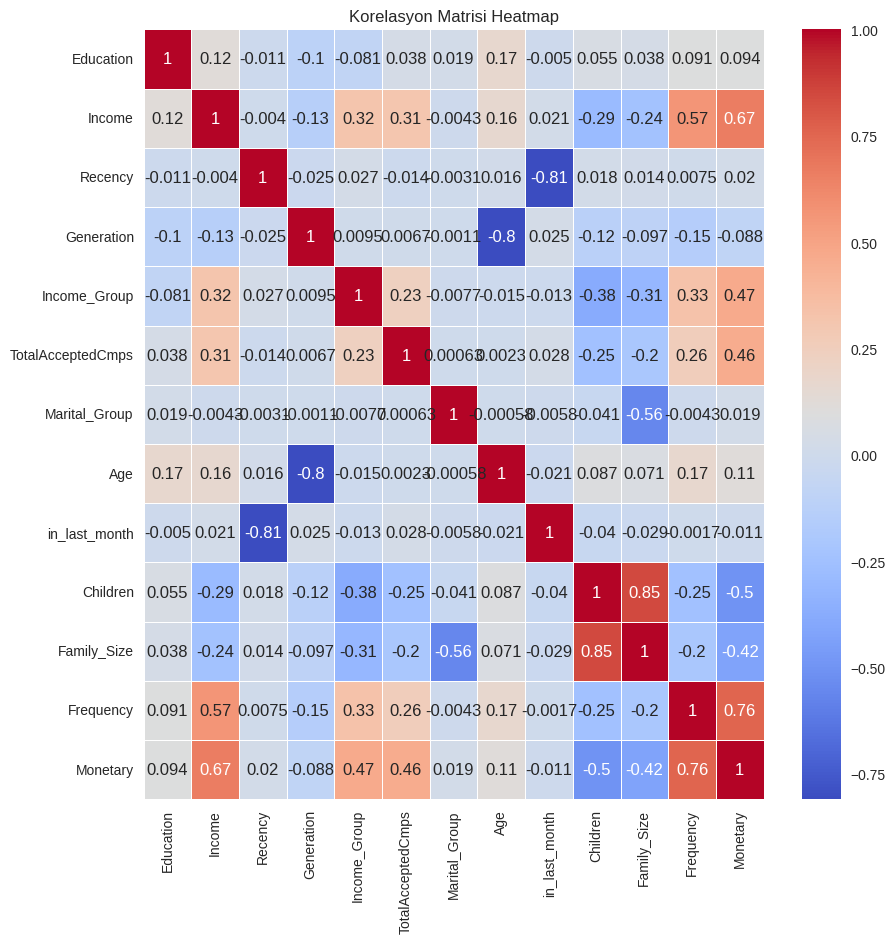

In [ ]:
#Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Korelasyon matrisini ısı haritası ile görselleştir
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasyon Matrisi Heatmap')
plt.show()

Children family size ile, recency, in_last month ile fazla korelasyona sahip Benzer etkileri olabileceğinden veri setinden birer tanesini ıkartıyoruz

In [ ]:
df.drop(['Children',"in_last_month"],axis=1, inplace=True)
df

Education   Income Dt_Customer  Recency  Generation  Income_Group  \
0             2  58138.0  2012-09-04       58           0             3   
1             2  46344.0  2014-03-08       38           0             2   
2             2  71613.0  2013-08-21       26           2             4   
3             2  26646.0  2014-02-10       26           3             0   
4             4  58293.0  2014-01-19       94           3             3   
...         ...      ...         ...      ...         ...           ...   
2235          2  61223.0  2013-06-13       46           2             3   
2236          4  64014.0  2014-06-10       56           0             3   
2237          2  56981.0  2014-01-25       91           3             3   
2238          3  69245.0  2014-01-24        8           0             4   
2239          4  52869.0  2012-10-15       40           0             2   

      TotalAcceptedCmps  Marital_Group  Age  Family_Size  Frequency  Monetary  
0                     0              1   66            1         25      1617  
1                     0              1   69            3          6        27  
2                     0              0   58            2         21       776  
3                     0              0   39            3          8        53  
4                     0              0   42            3         19       422  
...                 ...            ...  ...          ...        ...       ...  
2235                  0              0   56            3         18      1341  
2236                  1              0   77            5         22       444  
2237                  1              1   42            1         19      1241  
2238                  0              0   67            3         23       843  
2239                  0              0   69            4         11       172  

[2216 rows x 12 columns]

## Standardizasyon

Standartlaştırma, verileri 0 ortalama ve 1 standart sapmaya sahip olacak şekilde dönüştüren özel bir ölçeklendirme türüdür. * Standartlaştırma, verileri birçok makine öğrenimi algoritması ve istatistiksel test gibi Gauss dağılımı varsayan algoritmalar için uygun hale getirir. Ayrıca bazı modellerde farklı özelliklerin önemini vurgulamaya yardımcı olur.

In [ ]:
df_clustering=df[["Education","Age", "Recency","Family_Size","Monetary","Frequency","Income", "Generation","Marital_Group"]]

#Scaling
scaler = StandardScaler()
scaler.fit(df_clustering)
scaled_features = pd.DataFrame(scaler.transform(df_clustering),columns= df_clustering.columns )
print('Tüm featurelar scale edilmiştir')
scaled_features.head()


Tüm featurelar scale edilmiştir


Education       Age   Recency  Family_Size  Monetary  Frequency    Income  \
0  -0.350527  0.986443  0.310532    -1.758673  1.675488   1.319446  0.234063   
1  -0.350527  1.236801 -0.380509     0.450009 -0.962358  -1.157987 -0.234559   
2  -0.350527  0.318822 -0.795134    -0.654332  0.280250   0.797881  0.769478   
3  -0.350527 -1.266777 -0.795134     0.450009 -0.919224  -0.897205 -1.017239   
4   1.429011 -1.016420  1.554407     0.450009 -0.307044   0.537099  0.240221   

   Generation  Marital_Group  
0   -1.313081       1.321528  
1   -1.313081       1.321528  
2    0.420483      -0.736452  
3    1.287266      -0.736452  
4    1.287266      -0.736452

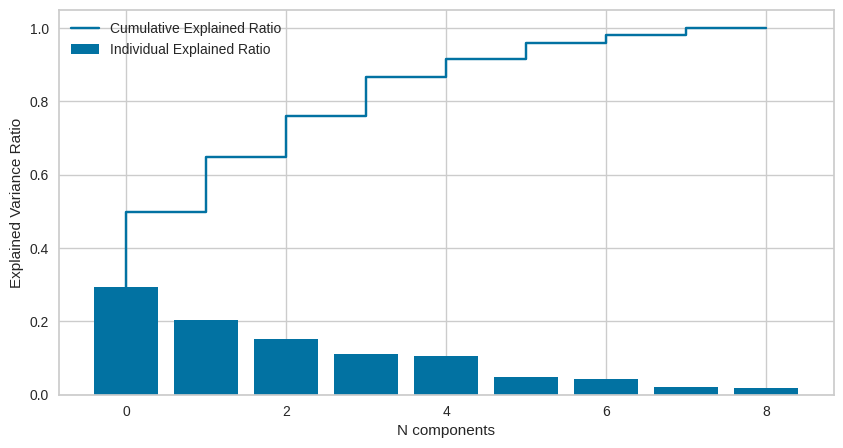

In [ ]:
pca = PCA()
pca.fit(scaled_features)
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

Bizim veri setimiz için PCA analizinde ilk 5 bileşen genel küme dağılımı için (yakllaşık %90'ı) fikir vermektedir. Öznitelik sayımızı 5 olarak belirleyerek analize devam ettik.

In [ ]:
num_components = 5
selected_components = pca.components_[:num_components]

feature_names = scaled_features.columns
selected_feature_names = [feature_names[i] for i in range(num_components)]

print("En yüksek 5 öznitelik:", selected_feature_names)


En yüksek 5 öznitelik: ['Education', 'Age', 'Recency', 'Family_Size', 'Monetary']


In [ ]:
cols = ["PCA1", "PCA2", "PCA3","PCA4","PCA5"]
pca = PCA(n_components=len(cols))
pca.fit(scaled_features)
PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(cols))
PCA_df.describe().T

count          mean       std       min       25%       50%       75%  \
PCA1  2216.0  3.527062e-17  1.626508 -3.020076 -1.412290 -0.101715  1.352995   
PCA2  2216.0 -3.527062e-17  1.358290 -3.470809 -0.967673  0.014215  0.904778   
PCA3  2216.0  2.244494e-17  1.165065 -3.554506 -0.959861  0.242119  0.866986   
PCA4  2216.0 -1.843692e-17  1.003370 -2.139199 -0.789861  0.010462  0.808757   
PCA5  2216.0 -1.923852e-17  0.974180 -2.203788 -0.657010  0.031619  0.589724   

            max  
PCA1  10.595681  
PCA2   3.966077  
PCA3   6.025927  
PCA4   2.392441  
PCA5   3.119316

K-Means algoritmasını kullanarak Elbow metodu ile en uygun veri kümesini belirlemeye çalıştık

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

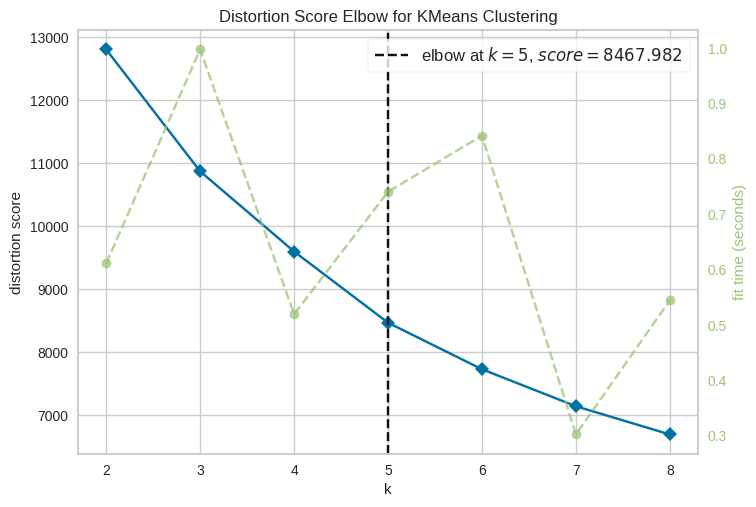

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=8)
visualizer.fit(PCA_df)
visualizer.show()

Silhouette score denetimsiz öğrenmede kümelerin kalitesini ölçmek için kullanılan bir metriktir. Bir kümedeki her bir veri noktasının, en yakın komşu kümeye kıyasla aynı kümedeki diğer veri noktalarına ne kadar benzer olduğunu ölçer.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

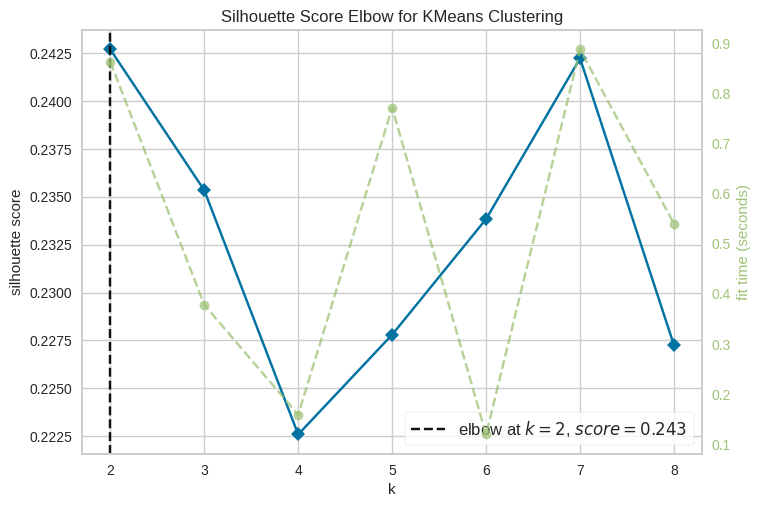

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=8, metric='silhouette')
visualizer.fit(PCA_df)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

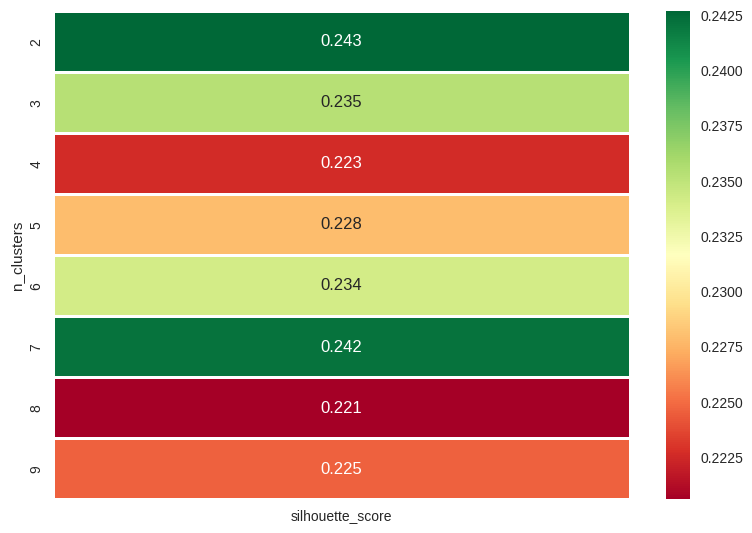

In [ ]:
from sklearn.metrics import silhouette_score
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.show()

visualize_silhouette_layer(PCA_df)

silhouette score nispeten yüksek ancak kümeleme geliştirilebilir. Ek olarak score değerlerinin birbirine yakın olması kümelerin homojen olarak da dağıldığını söyleyebilir

Elbow metodu ve silhuette score ile yaptığımız küme sayısı tahminleri birbirlerinden farklı çıkmıştır. Burada elbow metotu için çıkarttığımız grafiğin ve ilk yavaşlamaya başladığı noktayı, silhuette score ile anlamlı gelebilecek küme sayısını seçtik. Burada tahminleme yapacağımız küme sayısını 3 olarak belirledik.

In [ ]:
nb_clusters = visualizer.elbow_value_
AC = AgglomerativeClustering(n_clusters=3)#nb_clusters

# Model fitting and clustring predicted
AC_df = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = AC_df

df["Clusters"]= AC_df

In [ ]:
df["Clusters"] # Belirlenen kümeler

0       1
1       1
2       2
3       0
4       0
       ..
2235    2
2236    1
2237    2
2238    1
2239    1
Name: Clusters, Length: 2216, dtype: int64

Küme tahminleme için pca analizi uygulanmış son veri setim 5 öznitelik taşıdığı için, en etkili 3 öznitelik için belirlenen kümeleri 3d uzayda incelemek istiyorum

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(PCA_df[["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]])

PCA_df["PCA_result1"] = pca_result[:, 0]
PCA_df["PCA_result2"] = pca_result[:, 1]
PCA_df["PCA_result3"] = pca_result[:, 2]

x = PCA_df["PCA_result1"]
y = PCA_df["PCA_result2"]
z = PCA_df["PCA_result3"]
c = PCA_df["Clusters"]

trace1 = go.Scatter3d(x=x, y=y, z=z, mode='markers',
                    marker=dict(size=6, color=c, colorscale='Viridis', colorbar=dict(title='Clusters')))

data = [trace1]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
fig = px.histogram(data_frame=df, x="Clusters", color="Clusters", color_discrete_sequence=palette,nbins=12)

fig.update_layout(title="Kümelerin dağılımı")
fig.update_xaxes(title_text="Clusters")
fig.update_yaxes(title_text="Count")

fig.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.

/usr/local/lib/python3

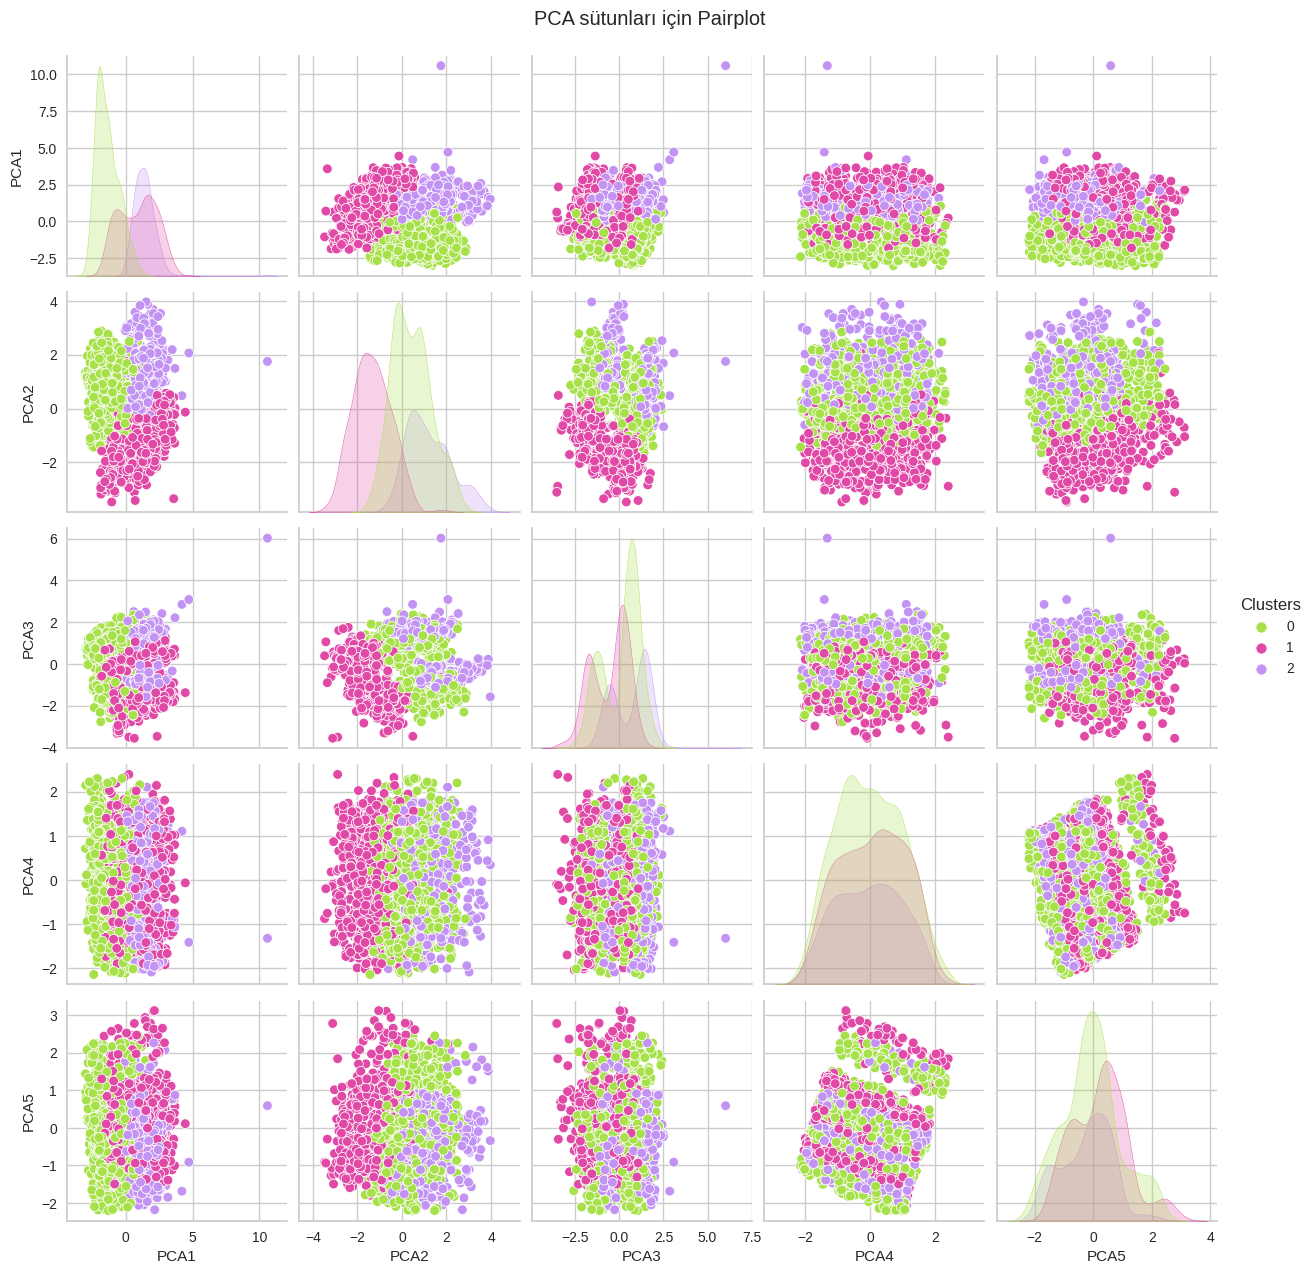

In [ ]:
# PCA sütunlarına göre pairplot dağılımları
sns.pairplot(data=PCA_df, vars=['PCA1', 'PCA2', 'PCA3', "PCA4","PCA5"], hue='Clusters', palette=palette)
plt.suptitle("PCA sütunları için Pairplot", y=1.02)
plt.show()

Bazı parametrelerin kümeleme sonucunda uygun şekilde kümelendiğini bazı özelliklerin uygun şekilde kümelenmediğini görebiliyoruz

In [ ]:
PCA_df

PCA1      PCA2      PCA3      PCA4      PCA5  Clusters  PCA_result1  \
0     2.809208  0.215098 -1.662115  0.573877  0.647107         1     2.809208   
1    -0.648348 -1.473988 -1.961166 -0.225718  0.580509         1    -0.648348   
2     0.965860  0.359486  0.671640 -0.621938  0.693142         2     0.965860   
3    -2.306040  0.888388  0.823053 -0.733747  0.178597         0    -2.306040   
4    -0.325782  0.647501  1.477333  0.901427 -2.096501         0    -0.325782   
...        ...       ...       ...       ...       ...       ...          ...   
2211  0.730801  0.070152  1.214322  0.038067  0.410580         2     0.730801   
2212  0.699304 -3.414779  1.061394 -0.196379 -0.935758         1     0.699304   
2213  0.970985  2.697418 -0.679681  1.457684 -0.481223         2     0.970985   
2214  1.497508 -1.657044  0.511758 -1.415412  0.460910         1     1.497508   
2215 -0.346453 -2.729324  0.211524 -0.740336 -0.885345         1    -0.346453   

      PCA_result2  PCA_result3  
0        0.215098    -1.662115  
1       -1.473988    -1.961166  
2        0.359486     0.671640  
3        0.888388     0.823053  
4        0.647501     1.477333  
...           ...          ...  
2211     0.070152     1.214322  
2212    -3.414779     1.061394  
2213     2.697418    -0.679681  
2214    -1.657044     0.511758  
2215    -2.729324     0.211524  

[2216 rows x 9 columns]

In [ ]:
df

Education   Income Dt_Customer  Recency  Generation  Income_Group  \
0             2  58138.0  2012-09-04       58           0             3   
1             2  46344.0  2014-03-08       38           0             2   
2             2  71613.0  2013-08-21       26           2             4   
3             2  26646.0  2014-02-10       26           3             0   
4             4  58293.0  2014-01-19       94           3             3   
...         ...      ...         ...      ...         ...           ...   
2235          2  61223.0  2013-06-13       46           2             3   
2236          4  64014.0  2014-06-10       56           0             3   
2237          2  56981.0  2014-01-25       91           3             3   
2238          3  69245.0  2014-01-24        8           0             4   
2239          4  52869.0  2012-10-15       40           0             2   

      TotalAcceptedCmps  Marital_Group  Age  Family_Size  Frequency  Monetary  \
0                     0              1   66            1         25      1617   
1                     0              1   69            3          6        27   
2                     0              0   58            2         21       776   
3                     0              0   39            3          8        53   
4                     0              0   42            3         19       422   
...                 ...            ...  ...          ...        ...       ...   
2235                  0              0   56            3         18      1341   
2236                  1              0   77            5         22       444   
2237                  1              1   42            1         19      1241   
2238                  0              0   67            3         23       843   
2239                  0              0   69            4         11       172   

      Clusters  
0            1  
1            1  
2            2  
3            0  
4            0  
...        ...  
2235         2  
2236         1  
2237         2  
2238         1  
2239         1  

[2216 rows x 13 columns]

In [ ]:
means = df.groupby(['Clusters']).agg({'Family_Size': 'mean',
                                                     'Income': 'mean',
                                                     'Age': 'mean',
                                                     'Recency': 'mean',
                                                     'Frequency': 'mean',
                                                     'Monetary': 'mean'})
counts = df['Clusters'].value_counts().reset_index()
counts.columns = ['Clusters', 'Count']

result = pd.merge(means, counts, on='Clusters')
result

Clusters  Family_Size        Income        Age    Recency  Frequency  \
0         0     2.838144  37657.194845  47.063918  48.268041  10.084536   
1         1     2.603175  57054.243386  67.092593  49.746032  16.490741   
2         2     2.089796  73713.106122  48.342857  49.355102  21.891837   

      Monetary  Count  
0   189.469072    970  
1   705.376984    756  
2  1282.100000    490

Küme 0 :
* Bu kümenin toplam üye sayısı 970'dır
* Diğer kümelerle karşılaştırıldığında, düşük gelir ve düşük harcamaya  sahiptirler
* Aile büyüklükleri 2 ile 3 kişi arasındadır.
* Yaşları 50 ile 70 arasındadır.

Küme 1 :
* Bu kümenin toplam üyesi 756'tür
* Diğer kümelerle karşılaştırıldığında, ortalama Gelire ve ortalama harcamaya sahiptirler.
* Aile Büyüklükleri 2 ile 3 kişi arasındadır.
* Yaşları 50 ile 70 arasındadır.

Küme 2 :
* Bu kümenin toplam üye sayısı 490'dir.
* Diğer kümelere kıyasla yüksek gelire ve yüksek harcamaya sahiptirler.
* Aile büyüklükleri 1 ile 3 kişi arasındadır.
* Yaşları 45 ile 55 arasındadır.

PCA Analizine göre öznitelik azalttım ve k means algoritmasını kullanarak kümelerimi belirledim.

## RFM Analizi (Recency, Frequency, Monetary)

* Pazarlama ve müşteri ilişkileri yönetiminde kullanılan bir müşteri segmentasyonu ve analizi yöntemidir. Açılımı Recency, Frequency ve Monetary Value'dur ve müşterileri bu üç boyuta göre segmente etmeyi içerir.
* RFM analizi, işletmelerin müşteri davranışlarını anlamalarına ve değerli müşteri segmentlerini belirlemelerine yardımcı olur. Pazarlama stratejilerini kişiselleştirmek, yüksek değerli müşterileri hedeflemek ve müşteriyi elde tutmayı iyileştirmek için kullanılır.

* PCA Analizi ile belirlediğim kümelerim için RFM analizi kullanarak segmantasyon gerçekleştireceğiz.

RFM Analizi için, Recency Frequency ve Monetary verilerimi 5 eşit parçaya böldüm, daha düşük receny daha iyi bir durumu temsil ettiği için onu alt değerden itibaren büyüklük vermeye başladım.

In [ ]:
#RFM SCORES 2 boyutlu map üzerinden ilerledik, bu yüzden iki boyutlu bir skor hesapladık
def get_rfm_scores(dataframe):
    dataframe["R"] = pd.qcut(dataframe["Recency"], 5, labels=[5, 4, 3, 2, 1])
    dataframe["F"] = pd.qcut(dataframe["Frequency"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    dataframe["M"] = pd.qcut(dataframe["Monetary"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["RFM_SCORE"] = dataframe["R"].astype(str) + dataframe["F"].astype(str) #+ dataframe["M"].astype(str)
    return dataframe



In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [ ]:
get_rfm_scores(df)
df.reset_index()

#RFM segment
df['segment'] = df['RFM_SCORE'].replace(seg_map, regex = True)
df.head()

Education   Income Dt_Customer  Recency  Generation  Income_Group  \
0          2  58138.0  2012-09-04       58           0             3   
1          2  46344.0  2014-03-08       38           0             2   
2          2  71613.0  2013-08-21       26           2             4   
3          2  26646.0  2014-02-10       26           3             0   
4          4  58293.0  2014-01-19       94           3             3   

   TotalAcceptedCmps  Marital_Group  Age  Family_Size  Frequency  Monetary  \
0                  0              1   66            1         25      1617   
1                  0              1   69            3          6        27   
2                  0              0   58            2         21       776   
3                  0              0   39            3          8        53   
4                  0              0   42            3         19       422   

   Clusters  R  F  M RFM_SCORE              segment  
0         1  3  5  5        35      loyal_customers  
1         1  4  1  1        41            promising  
2         2  4  4  4        44      loyal_customers  
3         0  4  2  1        42  potential_loyalists  
4         0  1  4  3        14              at_Risk

In [ ]:
x = df.segment.value_counts()


fig = px.treemap(x, path=[x.index], values=x, color=x.index,
                 color_discrete_map={x.index[i]: palette[i % len(palette)] for i in range(len(x.index))})


fig.update_layout(title_text='RFM Segmeantasyon Dağılımı', title_x=0.5,title_font=dict(size=20))
fig.update_traces(textinfo="label+value+percent root")
fig.show()

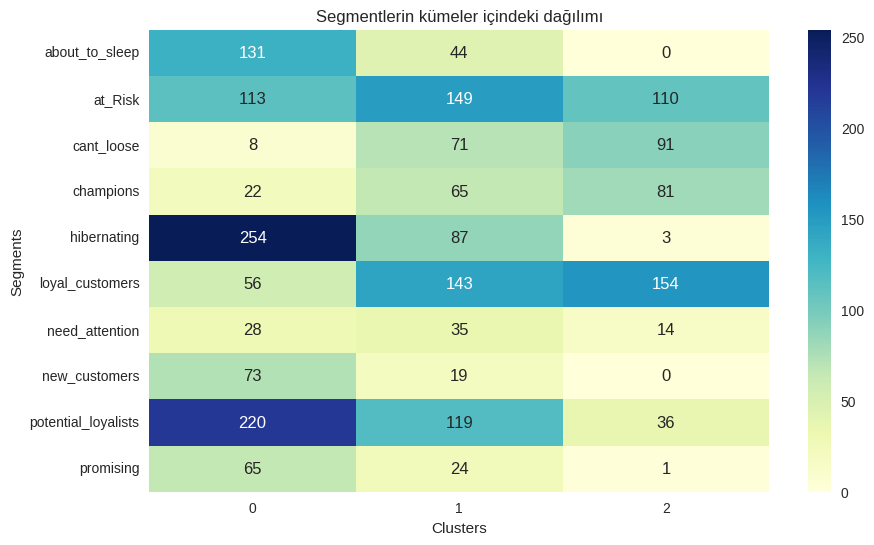

In [ ]:
grouped = df.groupby(['Clusters', 'segment']).size().reset_index(name='Count')

pivot_table = grouped.pivot(index='segment', columns='Clusters', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='g', cbar=True)
plt.xlabel('Clusters')
plt.ylabel('Segments')
plt.title('Segmentlerin kümeler içindeki dağılımı')
plt.show()

In [ ]:
grouped = df.groupby(['Clusters', 'segment']).size().reset_index(name='Count')
pivot_table = grouped.pivot(index='segment', columns='Clusters', values='Count').fillna(0)

fig = px.bar(pivot_table, x=pivot_table.index, y=pivot_table.columns,
            title='Stacked Bar Plot', labels={'x': 'Clusters', 'y': 'Count'},
            color_discrete_sequence=palette)

fig.show()

In [ ]:
grouped = df.groupby(['Clusters', 'segment']).size().reset_index(name='Count')
pivot_table = grouped.pivot(index='Clusters', columns='segment', values='Count').fillna(0)

fig = px.bar(pivot_table, x=pivot_table.index, y=pivot_table.columns,
             title='Kümelerdeki Segmantasyon Sayıları', labels={'index': 'Clusters', 'value': 'Count'},
             color_discrete_sequence=palette)


fig.show()

### Küme 0

* Bu kümenin toplam üye sayısı 970'dır
* Diğer kümelerle karşılaştırıldığında, düşük gelir ve düşük harcamaya  sahiptirler
* Aile büyüklükleri 2 ile 3 kişi arasındadır.
* Yaşları 50 ile 70 arasındadır.
* Yüksek sayıda "Kış uykusunda" (254) ve "Potansiyel sadık" (220) ile karakterize edilir. Ayrıca "uyumak üzere", "risk altında", "umut veren"  segmentlerine de sahiptir.
En değerli müşteriler olan "kış uykusunda" ve potansiyel olarak müdavim sayılabilecek "potansiyel sadıklar" tarafından domine edilir. Bu müşterileri korumak ve beslemek çok önemlidir. "kış uykusunda olan müşterilğeri uyuandırmak için yeni kampanyalar ve fırsatlar düzenlenebilir".


### Küme 1
* Bu kümenin toplam üyesi 756'tür
* Diğer kümelerle karşılaştırıldığında, ortalama Gelire ve ortalama harcamaya sahiptirler.
* Aile Büyüklükleri 2 ile 3 kişi arasındadır.
* Yaşları 50 ile 70 arasındadır.
* Bu küme, önemli sayıda "risk altındaki" müşteriler (149) ve "sadık" (143) ile çeşitli segmentlere sahiptir. Ayrıca "uyumak üzere", "risk altında", "şampiyonlar", "potansiyel sadık", "dikkat gerektiren", "yeni müşteriler" ve "gelecek vaat eden" segmentlerindeki müşterileri de içermektedir.
Hem potansiyel sadık müşteriler hem de dikkat gerektiren müşteriler dahil olmak üzere farklı müşteri segmentlerinin bir karışımına sahiptir. "Potansiyel_sadık müşterileri" elde tutmaya ve "risk altındaki" müşterilerle yeniden etkileşime geçmeye odaklanmak önemlidir.


### Küme 2
* Bu kümenin toplam üye sayısı 490'dir.
* Diğer kümelere kıyasla yüksek gelire ve yüksek harcamaya sahiptirler.
* Aile büyüklükleri 1 ile 3 kişi arasındadır.
* Yaşları 45 ile 55 arasındadır.
* "Risk Altında", "Kaybedemem", "Şampiyonlar", "Sadık Müşteriler", "Dikkat Gerektirenler" ve "Potansiyel Sadıklar" dahil olmak üzere daha az sayıda segmente sahiptir.
"Sadık müşteriler "e odaklanmaya ve bu segmentte büyüme fırsatlarını belirlemeye değer.
Sadakatlerini daha da güçlendirmek için "sadık müşteriler "in ihtiyaçlarını ve tercihlerini anlamaya çalışılabilir. Ayrıca, "kaybedemem", "şampiyonlar" ve "potansiyel sadık müşterileri" uzun vadeli sadık müşterilere dönüştürmenin yolları araştırılabilir.



Kazanılan gelire göre kümelerin dağılımları

<Figure size 800x550 with 0 Axes>

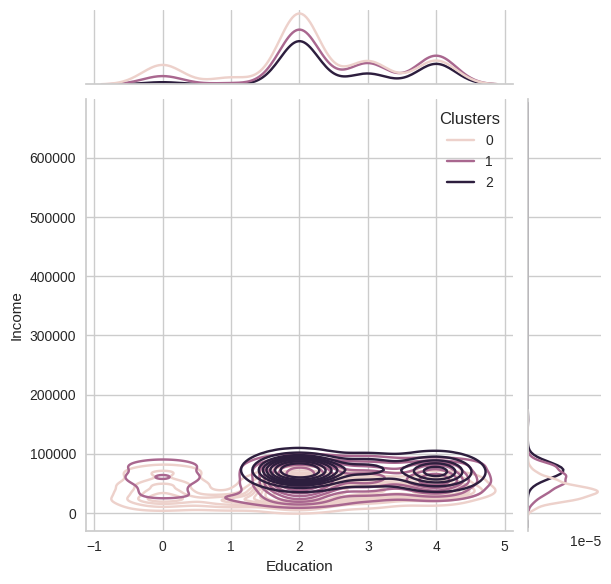

<Figure size 800x550 with 0 Axes>

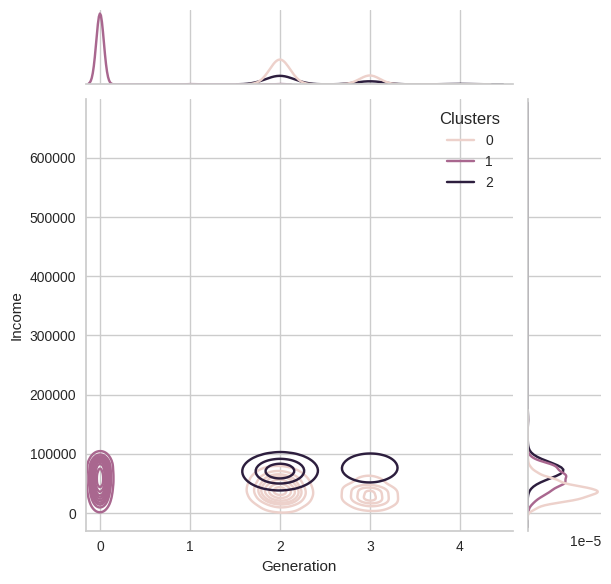

<Figure size 800x550 with 0 Axes>

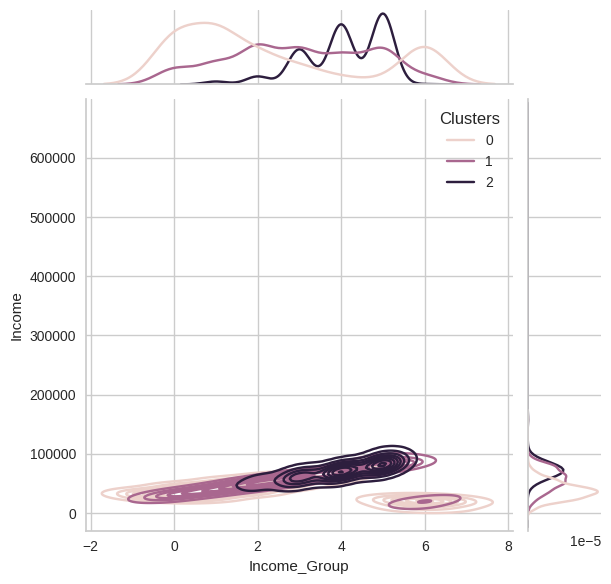

<Figure size 800x550 with 0 Axes>

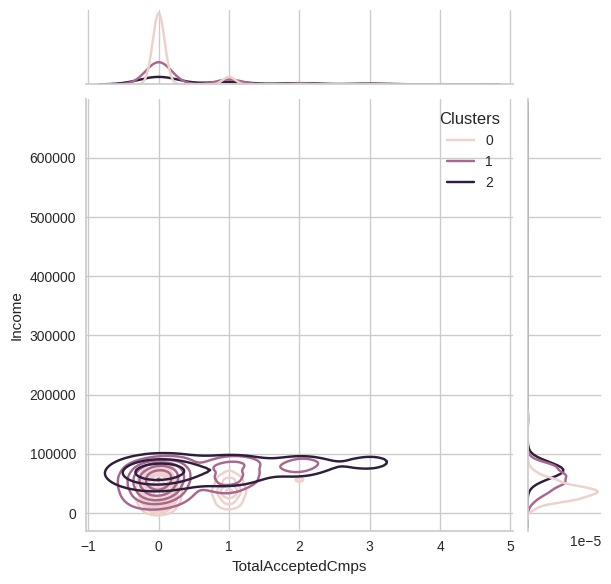

<Figure size 800x550 with 0 Axes>

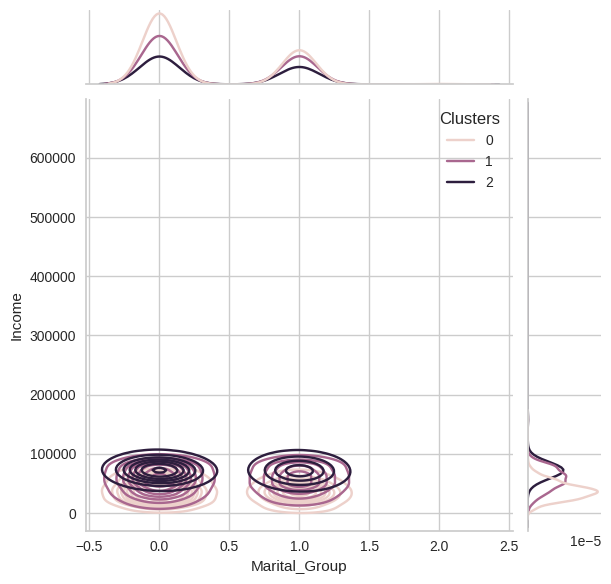

<Figure size 800x550 with 0 Axes>

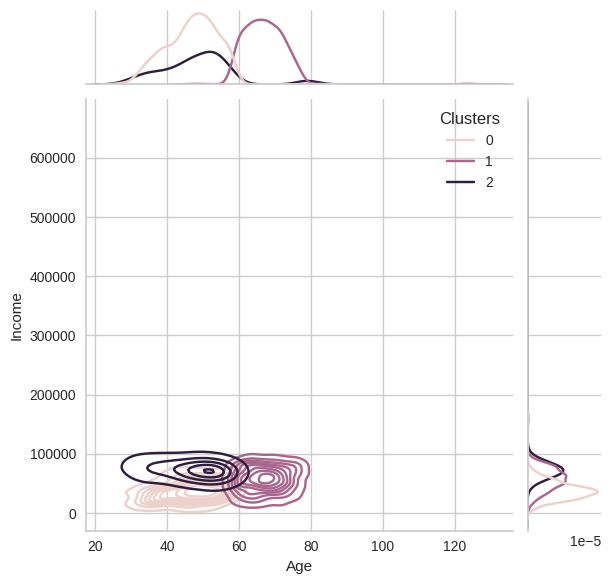

<Figure size 800x550 with 0 Axes>

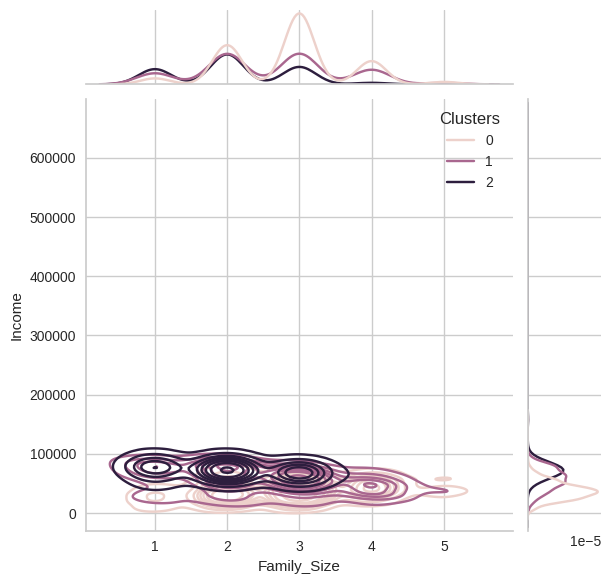

In [ ]:
Personal = ["Education","Generation", "Income_Group", "TotalAcceptedCmps", "Marital_Group", "Age", "Family_Size"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Income"], hue =df["Clusters"], kind="kde")
    plt.show()

In [ ]:
df["Monetary"] = df["Monetary"].astype(int)

Yapılan toplam harcamaya göre kümelerin dağılım bilgileri

<Figure size 800x550 with 0 Axes>

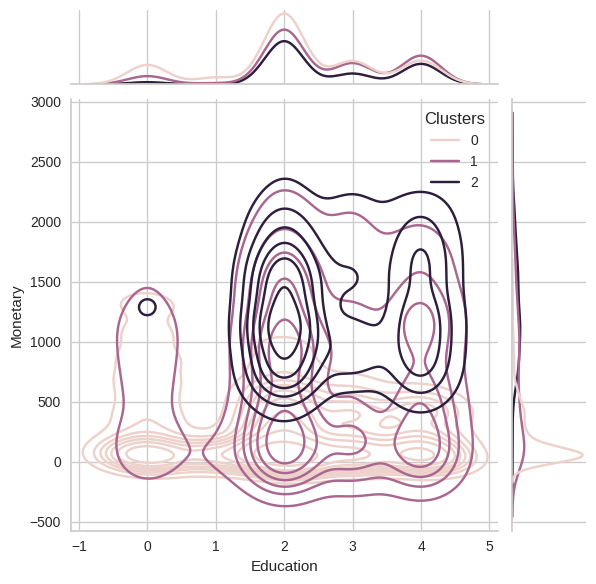

<Figure size 800x550 with 0 Axes>

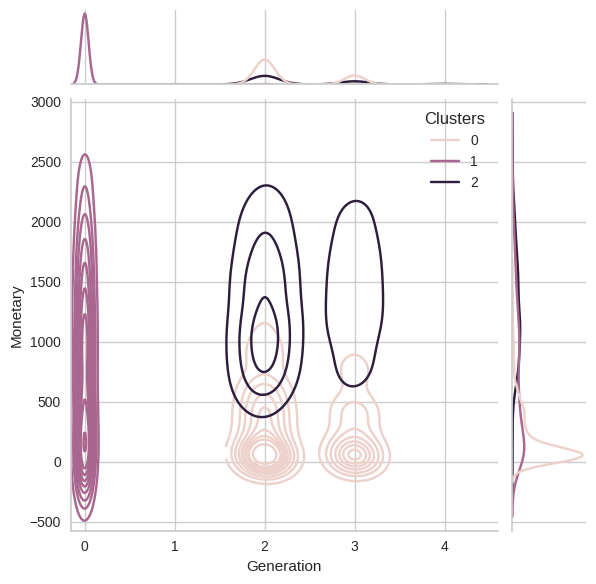

<Figure size 800x550 with 0 Axes>

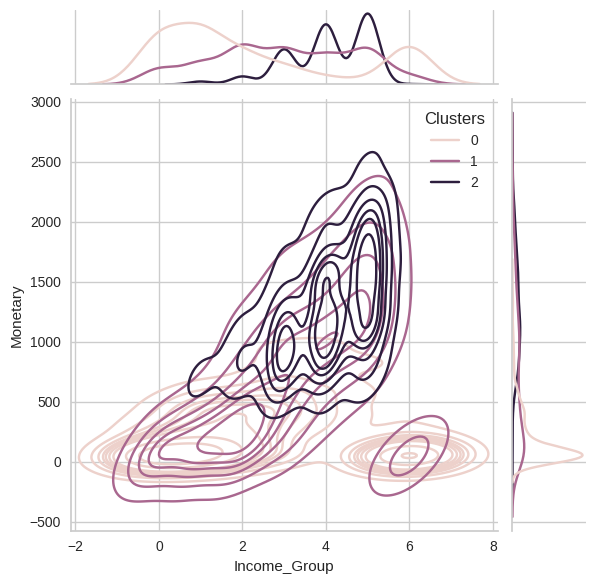

<Figure size 800x550 with 0 Axes>

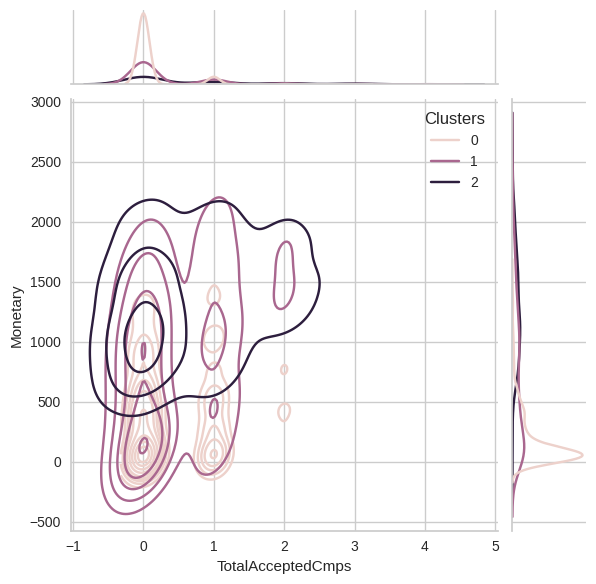

<Figure size 800x550 with 0 Axes>

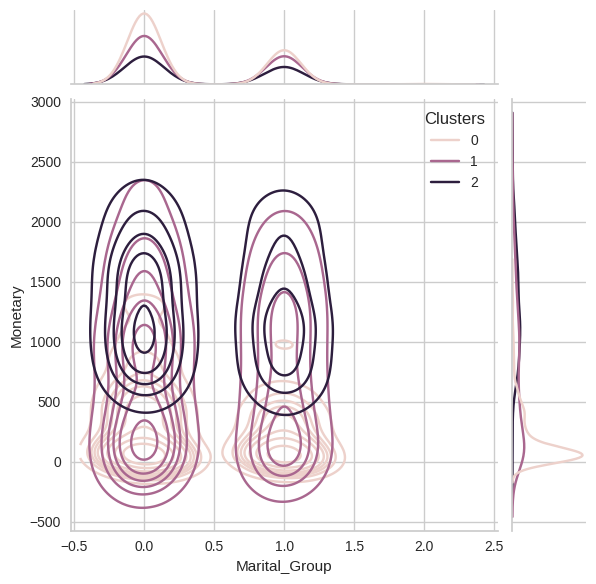

<Figure size 800x550 with 0 Axes>

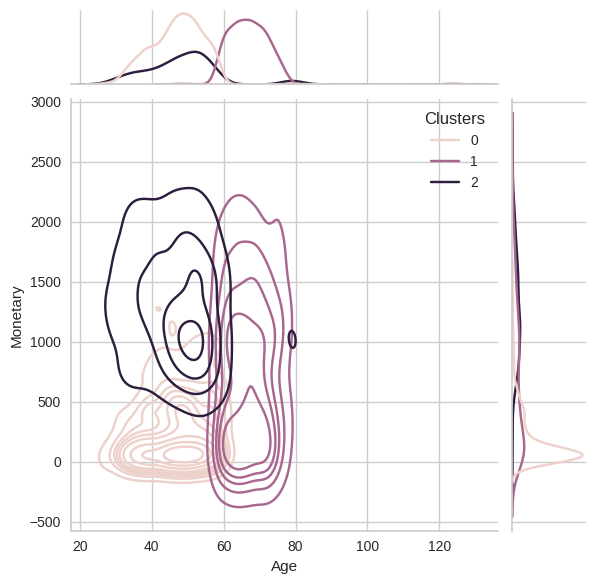

<Figure size 800x550 with 0 Axes>

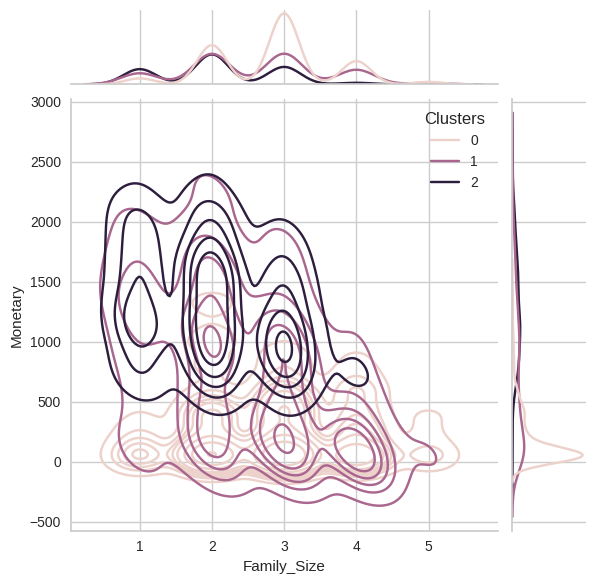

In [ ]:
Personal = ["Education","Generation", "Income_Group", "TotalAcceptedCmps", "Marital_Group", "Age", "Family_Size"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Monetary"], hue =df["Clusters"], kind="kde")
    plt.show()